In [41]:
!pip install nltk

In [42]:
!pip install scikit-learn


In [43]:
!pip install --upgrade pip setuptools wheel


In [44]:
import nltk
import matplotlib.pyplot as plt
from collections import Counter
import string
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [45]:
# Function to load Bangla text from a file
def load_human_written_text(file_path):
    with open('/content/java_jatrir_potro_probondho_rabindra.txt', 'r', encoding='utf-8') as file:
        return file.read()

# Path to the text file
file_path = '/content/java_jatrir_potro_probondho_rabindra.txt'

# Load the text from the file and store it in the 'text' variable
human_written_text = load_human_written_text(file_path)

# Print the text to verify
print(human_written_text)

﻿জাভাযাত্রীর পত্র 


১


কল্যাণীয়াসু


 


যাত্রা যখন আরম্ভ করা গেল আকাশ থেকে বর্ষার পর্দা তখন সরিয়ে দিয়েছে; সূর্য আমাকে অভিনন্দন করলেন। কলকাতা থেকে মাদ্রাজ পর্যন্ত যতদূর গেলুম রেলগাড়ির জানলা দিয়ে চেয়ে চেয়ে মনে হল, পৃথিবীতে সবুজের বান ডেকেছে; শ্যামলের বাঁশিতে তানের পর তান লাগছে, তার আর বিরাম নেই। খেতে খেতে নতুন ধানের অঙ্কুরে কাঁচা রং, বনে বনে রসপরিপুষ্ট প্রচুর পল্লবের ঘন সবুজ। ধরণীর বুকের থেকে অহল্যা জেগে উঠেছেন; নবদুর্বাদলশ্যাম রামচন্দ্রের পায়ের স্পর্শ লাগল।


 


প্রকৃতির এই নব জীবনের উৎসবে রূপের উত্তরে রসের গান গাবার জন্যেই আমি এসেছিলুম; এই কথাই কেবল মনে পড়ে। কাজের লোকেরা জিজ্ঞাসা করে, তার দরকার কী। বলে, ওটা শৌখিনতা। অর্থাৎ, এই প্রয়োজনের সংসারে আমরা বাহুল্যর দলে। তাতে লজ্জা পাব না। কেননা, এই বাহুল্যের দ্বারাই আত্মপরিচয়।


 


হিসাবি লোকেরা একটা কথা বারবার ভুলে যায় যে, প্রচুরের সাধনাতেই প্রয়োজনের সিদ্ধি; এই আষাঢ়ের পৃথিবীতে সেই কথাটাই জানালো। আমি চাই ফসল, যেটুকুতে আমার পেট ভরবে। সেই স্বল্প প্রত্যাশাকে মূর্তিমান দেখি তখনই যখন বর্ষণে অভিষিক্ত মাটির ভাণ্ডারে শ্যামল ঐশ্বর্য আমার প্রয়োজনকে

In [46]:
def bangla_sentence_tokenize(human_written_text):
    # Split sentences by full stop (।) used in Bangla
    sentences = human_written_text.split('।')
    sentences = human_written_text.split('\n\n')
    sentences = human_written_text.split('\n')
    return [sentence.strip() for sentence in sentences if sentence.strip()]

In [47]:
def bangla_word_tokenize(human_written_text):
    # Split words by spaces
    words = human_written_text.split()

    # Remove any leading/trailing whitespace and filter out empty strings
    words = [word.strip() for word in words if word.strip()]

    # Print the total number of words
    total_words = len(words)
    print(f"Total number of words: {total_words}")

    return words, total_words  # Also returning the total number of words


In [48]:
def preprocess_text(human_written_text):
    # Remove punctuation (you might want to keep Bangla-specific punctuation like "।")
    translator = str.maketrans('', '', string.punctuation)
    human_written_text = human_written_text.translate(translator)

    # Tokenize sentences using the custom function
    sentences = bangla_sentence_tokenize(human_written_text)

    # Tokenize words using the custom function
    words, total_words = bangla_word_tokenize(human_written_text) # Modified to correctly capture the two return values

    return words, total_words, sentences # Added total_words to the return statement


words, total_words, sentences = preprocess_text(human_written_text)
print(words)
print(total_words)
print(sentences)

Total number of words: 1185
['\ufeffজাভাযাত্রীর', 'পত্র', '১', 'কল্যাণীয়াসু', 'যাত্রা', 'যখন', 'আরম্ভ', 'করা', 'গেল', 'আকাশ', 'থেকে', 'বর্ষার', 'পর্দা', 'তখন', 'সরিয়ে', 'দিয়েছে', 'সূর্য', 'আমাকে', 'অভিনন্দন', 'করলেন।', 'কলকাতা', 'থেকে', 'মাদ্রাজ', 'পর্যন্ত', 'যতদূর', 'গেলুম', 'রেলগাড়ির', 'জানলা', 'দিয়ে', 'চেয়ে', 'চেয়ে', 'মনে', 'হল', 'পৃথিবীতে', 'সবুজের', 'বান', 'ডেকেছে', 'শ্যামলের', 'বাঁশিতে', 'তানের', 'পর', 'তান', 'লাগছে', 'তার', 'আর', 'বিরাম', 'নেই।', 'খেতে', 'খেতে', 'নতুন', 'ধানের', 'অঙ্কুরে', 'কাঁচা', 'রং', 'বনে', 'বনে', 'রসপরিপুষ্ট', 'প্রচুর', 'পল্লবের', 'ঘন', 'সবুজ।', 'ধরণীর', 'বুকের', 'থেকে', 'অহল্যা', 'জেগে', 'উঠেছেন', 'নবদুর্বাদলশ্যাম', 'রামচন্দ্রের', 'পায়ের', 'স্পর্শ', 'লাগল।', 'প্রকৃতির', 'এই', 'নব', 'জীবনের', 'উৎসবে', 'রূপের', 'উত্তরে', 'রসের', 'গান', 'গাবার', 'জন্যেই', 'আমি', 'এসেছিলুম', 'এই', 'কথাই', 'কেবল', 'মনে', 'পড়ে।', 'কাজের', 'লোকেরা', 'জিজ্ঞাসা', 'করে', 'তার', 'দরকার', 'কী।', 'বলে', 'ওটা', 'শৌখিনতা।', 'অর্থাৎ', 'এই', 'প্রয়োজনের', 'সংসারে', 'আমরা', 'বাহুল্যর', 'দলে।

In [49]:
# Function to load Bangla text from a file
def load_human_written_text(file_path):
    with open('/content/java_jatrir_potro_probondho_rabindra.txt', 'r', encoding='utf-8') as file:
        return file.read()

# Path to the text file
file_path = '/content/java_jatrir_potro_probondho_rabindra.txt'

# Load the text from the file and store it in the 'text' variable
human_written_text = load_human_written_text(file_path)

# Print the text to verify
print(human_written_text)

﻿জাভাযাত্রীর পত্র 


১


কল্যাণীয়াসু


 


যাত্রা যখন আরম্ভ করা গেল আকাশ থেকে বর্ষার পর্দা তখন সরিয়ে দিয়েছে; সূর্য আমাকে অভিনন্দন করলেন। কলকাতা থেকে মাদ্রাজ পর্যন্ত যতদূর গেলুম রেলগাড়ির জানলা দিয়ে চেয়ে চেয়ে মনে হল, পৃথিবীতে সবুজের বান ডেকেছে; শ্যামলের বাঁশিতে তানের পর তান লাগছে, তার আর বিরাম নেই। খেতে খেতে নতুন ধানের অঙ্কুরে কাঁচা রং, বনে বনে রসপরিপুষ্ট প্রচুর পল্লবের ঘন সবুজ। ধরণীর বুকের থেকে অহল্যা জেগে উঠেছেন; নবদুর্বাদলশ্যাম রামচন্দ্রের পায়ের স্পর্শ লাগল।


 


প্রকৃতির এই নব জীবনের উৎসবে রূপের উত্তরে রসের গান গাবার জন্যেই আমি এসেছিলুম; এই কথাই কেবল মনে পড়ে। কাজের লোকেরা জিজ্ঞাসা করে, তার দরকার কী। বলে, ওটা শৌখিনতা। অর্থাৎ, এই প্রয়োজনের সংসারে আমরা বাহুল্যর দলে। তাতে লজ্জা পাব না। কেননা, এই বাহুল্যের দ্বারাই আত্মপরিচয়।


 


হিসাবি লোকেরা একটা কথা বারবার ভুলে যায় যে, প্রচুরের সাধনাতেই প্রয়োজনের সিদ্ধি; এই আষাঢ়ের পৃথিবীতে সেই কথাটাই জানালো। আমি চাই ফসল, যেটুকুতে আমার পেট ভরবে। সেই স্বল্প প্রত্যাশাকে মূর্তিমান দেখি তখনই যখন বর্ষণে অভিষিক্ত মাটির ভাণ্ডারে শ্যামল ঐশ্বর্য আমার প্রয়োজনকে

In [50]:
!pip install BnLemma

In [51]:
import BnLemma as lm
import string

# Define a list of Bangla stop words (you can extend this list as needed)
bangla_stop_words = ['এ', 'ও', 'আছে', 'থেকে', 'কিন্তু', 'যা', 'যে', 'এবং', 'এই', 'ওই', 'হয়', 'সে', 'আমি', 'আমরা', 'তুমি', 'তারা']

# Function to tokenize and lemmatize Bangla sentences
def bangla_sentence_tokenize(human_written_text):
    # Initialize the BnLemma lemmatizer
    bl = lm.Lemmatizer()

    # Split sentences by full stop (।) and newline characters
    sentences = human_written_text.split('।')
    sentences = [sentence for sublist in [s.split('\n\n') for s in sentences] for sentence in sublist]
    sentences = [sentence for sublist in [s.split('\n') for s in sentences] for sentence in sublist]

    # Strip and filter empty sentences
    sentences = [sentence.strip() for sentence in sentences if sentence.strip()]

    # Lemmatize each sentence, avoiding empty or problematic sentences
    lemmatized_sentences = []
    for sentence in sentences:
        if sentence:  # Ensure sentence is not empty
            try:
                lemmatized_sentence = bl.lemma(sentence)
                lemmatized_sentences.append(lemmatized_sentence)
            except KeyError as e:
                print(f"Error lemmatizing sentence: {sentence}, skipping. Error: {e}")

    # Return the list of lemmatized sentences
    return lemmatized_sentences

# Function to remove stop words and count words
def remove_stop_words(sentences):
    # Lists to hold sentences after stop word removal
    cleaned_sentences = []

    # Initialize counters
    total_words = 0
    remaining_words = 0
    total_removed_words = 0

    # Total number of sentences
    total_sentences = len(sentences)

    # Iterate over each sentence
    for sentence in sentences:
        # Tokenize the sentence into words
        words = sentence.split()

        # Count the total number of words
        total_words += len(words)

        # Remove stop words from the sentence
        filtered_words = [word for word in words if word not in bangla_stop_words]

        # Count the number of removed stop words
        removed_words_count = len(words) - len(filtered_words)
        total_removed_words += removed_words_count

        # Count the number of remaining words after removing stop words
        remaining_words += len(filtered_words)

        # Join the words back into a cleaned sentence
        cleaned_sentence = ' '.join(filtered_words)

        # Add the cleaned sentence to the list
        cleaned_sentences.append(cleaned_sentence)

    # Print the cleaned sentences
    print("Cleaned Sentences:", cleaned_sentences)

    # Print total and remaining word counts
    print(f"Total words: {total_words}")
    print(f"Remaining words after stop word removal: {remaining_words}")
    print(f"Total stop words removed: {total_removed_words}")
    print(f"Total sentences: {total_sentences}")

    return cleaned_sentences

# Preprocessing function to remove punctuation and lemmatize
def preprocess_text(human_written_text):
    # Remove punctuation (you might want to adjust for Bangla-specific punctuation)
    translator = str.maketrans('', '', string.punctuation)
    human_written_text = human_written_text.translate(translator)

    # Tokenize and lemmatize sentences using the custom function
    sentences = bangla_sentence_tokenize(human_written_text)

    return sentences


# Preprocess the text
sentences = preprocess_text(human_written_text)
# Remove stop words from the sentences and print results
cleaned_sentences = remove_stop_words(sentences)


Cleaned Sentences: ['যাত্রী পত্র', '১', 'কল্যাণ', 'যাত্রা যখন আরম্ভ করা গেল আকাশ বর্ষা পর্ণ তখন সরি দেওয়া সূর্য আমাকে নন্দন করা', 'কলকাতা মাদ্রাসা পর্যন্ত দূর গেলুম গাড়ি নলা দেওয়া চাওয়া চাওয়া মন হওয়া পৃথিবী সবুজ বান ডেক শ্যামল বাঁশি তান পরা তান লাগা তার আর বিরাম নেই', 'খাওয়া খাওয়া নতুন ধান অঙ্কুরে কাঁচা রং বন বন পরিপুষ্ট প্রচুর পল্লব ঘন সবুজ', 'ধরণ বুক অহল্যা জেগে উঠেছেন নবদুর্বাদলশ্যাম রাম পায়ে স্পর্শ গল', 'প্রকৃতি নব জীবন উৎসাহ রূপ উত্তর সের গান বার জন্য এসেছিলুম কথা কে মন পড়া', 'কাজ লোক জিজ্ঞাসা করা তার দরকার কী', 'বলা শৌখিনতা', 'অর্থাৎ প্রয়োজন সংসার বাহুল্য দল', 'তাত লজ্জা পাওয়া না', 'কেন বাহুল্য দ্বারা পরিচয়', 'হিসাব লোক একটি কথা বারবার ভুল যাওয়া প্রচুর সাধনা প্রয়োজন সিদ্ধি আষাঢ়ের পৃথিবী সেই কথা জানা', 'চাওয়া ফসল যেটুকু আমার পেট ভর', 'সেই স্বল্প প্রত্যাখ্যাত মূর্তি দেখি তখন যখন বর্ষ অভিষিক্ত মাটি ভাণ্ডারে শ্যামল ঐশ্বর্য আমার প্রয়োজন অনেক বেশি ছাপ পড়া', 'মুষ্টি জোট না যখন ধন সংকীর্ণ সেই মুষ্টি না ছাড় যাওয়া', 'প্রাণ কারবন প্রাণ মুনাফা লক্ষ্য মুনাফা বাহুল্য', 'আমাদের ন্যাস মানুষ বাহু

In [52]:
from itertools import combinations

# Function to create word pairs from a cleaned sentence
def create_word_pairs(cleaned_sentences):
    for sentence in cleaned_sentences:
        words = sentence.split()  # Tokenize the cleaned sentence into words

        # Generate pairs of words
        word_pairs = list(combinations(words, 2))  # Create pairs using combinations

        # Print the pairs and the count of pairs
        print(f"Sentence: '{sentence}'")
        print(f"Word Pairs: {word_pairs}")
        print(f"Number of pairs: {len(word_pairs)}\n")


create_word_pairs(cleaned_sentences)


Sentence: 'যাত্রী পত্র'
Word Pairs: [('যাত্রী', 'পত্র')]
Number of pairs: 1

Sentence: '১'
Word Pairs: []
Number of pairs: 0

Sentence: 'কল্যাণ'
Word Pairs: []
Number of pairs: 0

Sentence: 'যাত্রা যখন আরম্ভ করা গেল আকাশ বর্ষা পর্ণ তখন সরি দেওয়া সূর্য আমাকে নন্দন করা'
Word Pairs: [('যাত্রা', 'যখন'), ('যাত্রা', 'আরম্ভ'), ('যাত্রা', 'করা'), ('যাত্রা', 'গেল'), ('যাত্রা', 'আকাশ'), ('যাত্রা', 'বর্ষা'), ('যাত্রা', 'পর্ণ'), ('যাত্রা', 'তখন'), ('যাত্রা', 'সরি'), ('যাত্রা', 'দেওয়া'), ('যাত্রা', 'সূর্য'), ('যাত্রা', 'আমাকে'), ('যাত্রা', 'নন্দন'), ('যাত্রা', 'করা'), ('যখন', 'আরম্ভ'), ('যখন', 'করা'), ('যখন', 'গেল'), ('যখন', 'আকাশ'), ('যখন', 'বর্ষা'), ('যখন', 'পর্ণ'), ('যখন', 'তখন'), ('যখন', 'সরি'), ('যখন', 'দেওয়া'), ('যখন', 'সূর্য'), ('যখন', 'আমাকে'), ('যখন', 'নন্দন'), ('যখন', 'করা'), ('আরম্ভ', 'করা'), ('আরম্ভ', 'গেল'), ('আরম্ভ', 'আকাশ'), ('আরম্ভ', 'বর্ষা'), ('আরম্ভ', 'পর্ণ'), ('আরম্ভ', 'তখন'), ('আরম্ভ', 'সরি'), ('আরম্ভ', 'দেওয়া'), ('আরম্ভ', 'সূর্য'), ('আরম্ভ', 'আমাকে'), ('আরম্ভ', 'নন্দন'), ('আরম্

In [53]:
from collections import defaultdict
from itertools import combinations

# Function to check frequency of word pairs from cleaned sentences
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)  # Create a default dictionary to count pairs

    for sentence in cleaned_sentences:
        words = sentence.split()  # Tokenize the cleaned sentence into words
        word_pairs = combinations(words, 2)  # Create pairs using combinations

        # Count each pair's frequency
        for pair in word_pairs:
            pair_frequency[pair] += 1

    # Print the frequency of each pair if frequency > 1
    print("Pairs with Frequency > 1:")
    for pair, frequency in pair_frequency.items():
        if frequency > 1:  # Only print if frequency is greater than 1
            print(f"Pair: {pair}, Frequency: {frequency}")

check_pair_frequency(cleaned_sentences)  # Call the function



Pairs with Frequency > 1:
Pair: ('যাত্রা', 'করা'), Frequency: 3
Pair: ('যখন', 'করা'), Frequency: 3
Pair: ('যখন', 'তখন'), Frequency: 4
Pair: ('আরম্ভ', 'করা'), Frequency: 2
Pair: ('করা', 'তখন'), Frequency: 4
Pair: ('করা', 'দেওয়া'), Frequency: 3
Pair: ('করা', 'করা'), Frequency: 25
Pair: ('দেওয়া', 'করা'), Frequency: 2
Pair: ('আমাকে', 'করা'), Frequency: 2
Pair: ('কলকাতা', 'চাওয়া'), Frequency: 2
Pair: ('কলকাতা', 'তান'), Frequency: 2
Pair: ('মাদ্রাসা', 'চাওয়া'), Frequency: 2
Pair: ('মাদ্রাসা', 'তান'), Frequency: 2
Pair: ('পর্যন্ত', 'চাওয়া'), Frequency: 2
Pair: ('পর্যন্ত', 'তান'), Frequency: 2
Pair: ('দূর', 'চাওয়া'), Frequency: 2
Pair: ('দূর', 'হওয়া'), Frequency: 4
Pair: ('দূর', 'তান'), Frequency: 2
Pair: ('দূর', 'তার'), Frequency: 2
Pair: ('গেলুম', 'চাওয়া'), Frequency: 2
Pair: ('গেলুম', 'তান'), Frequency: 2
Pair: ('গাড়ি', 'চাওয়া'), Frequency: 2
Pair: ('গাড়ি', 'তান'), Frequency: 2
Pair: ('নলা', 'চাওয়া'), Frequency: 2
Pair: ('নলা', 'তান'), Frequency: 2
Pair: ('দেওয়া', 'চাওয়া'), Frequency: 2
Pai

In [54]:
pip install networkx matplotlib


# EDGES BETWEEN THE NODES THAT ARE NOT REPEATED IN A SENTENCE

Sentence: 'যাত্রী পত্র'
Word Pairs: [('যাত্রী', 'পত্র')]
Number of pairs: 1

Sentence: '১'
Word Pairs: []
Number of pairs: 0

Sentence: 'কল্যাণ'
Word Pairs: []
Number of pairs: 0

Sentence: 'যাত্রা যখন আরম্ভ করা গেল আকাশ বর্ষা পর্ণ তখন সরি দেওয়া সূর্য আমাকে নন্দন করা'
Word Pairs: [('যাত্রা', 'যখন'), ('যাত্রা', 'আরম্ভ'), ('যাত্রা', 'করা'), ('যাত্রা', 'গেল'), ('যাত্রা', 'আকাশ'), ('যাত্রা', 'বর্ষা'), ('যাত্রা', 'পর্ণ'), ('যাত্রা', 'তখন'), ('যাত্রা', 'সরি'), ('যাত্রা', 'দেওয়া'), ('যাত্রা', 'সূর্য'), ('যাত্রা', 'আমাকে'), ('যাত্রা', 'নন্দন'), ('যাত্রা', 'করা'), ('যখন', 'আরম্ভ'), ('যখন', 'করা'), ('যখন', 'গেল'), ('যখন', 'আকাশ'), ('যখন', 'বর্ষা'), ('যখন', 'পর্ণ'), ('যখন', 'তখন'), ('যখন', 'সরি'), ('যখন', 'দেওয়া'), ('যখন', 'সূর্য'), ('যখন', 'আমাকে'), ('যখন', 'নন্দন'), ('যখন', 'করা'), ('আরম্ভ', 'করা'), ('আরম্ভ', 'গেল'), ('আরম্ভ', 'আকাশ'), ('আরম্ভ', 'বর্ষা'), ('আরম্ভ', 'পর্ণ'), ('আরম্ভ', 'তখন'), ('আরম্ভ', 'সরি'), ('আরম্ভ', 'দেওয়া'), ('আরম্ভ', 'সূর্য'), ('আরম্ভ', 'আমাকে'), ('আরম্ভ', 'নন্দন'), ('আরম্

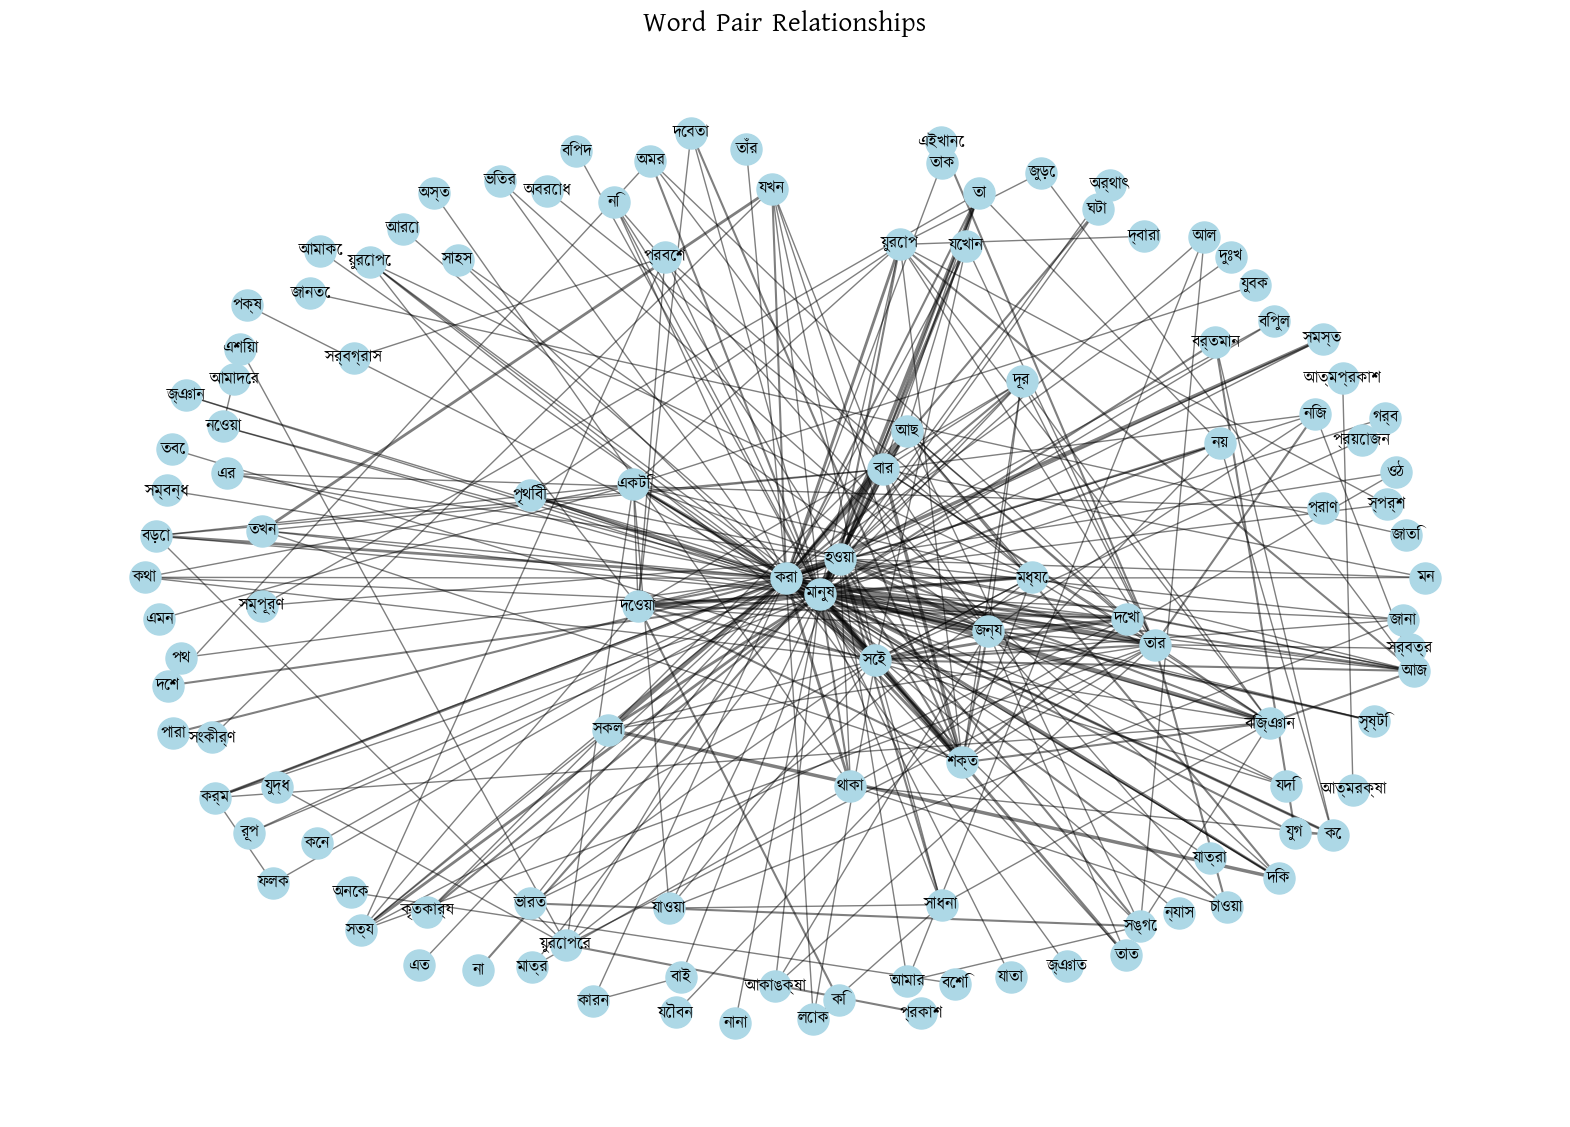

In [55]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
import logging
from pathlib import Path
import matplotlib.font_manager as fm

# Logging setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Function to set up custom font for Bangla
def custom_font(font_path):
    try:
        font_path = Path(font_path)
        if not font_path.exists():
            logger.error(f"Font file not found: {font_path}")
            return None

        # Load and register the font
        font_prop = fm.FontProperties(fname=str(font_path))
        font_name = font_prop.get_name()
        fm.fontManager.addfont(str(font_path))

        plt.rcParams['font.family'] = font_name
        logger.info(f"Font loaded successfully: {font_name}")
        return font_name
    except Exception as e:
        logger.error(f"Error loading font: {e}")
        return None

# Function to check frequency of word pairs that appear in the same sentence and have frequency > 1
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)

    # Iterate through sentences to collect word pairs
    for sentence in cleaned_sentences:
        words = sentence.split()
        unique_words = set(words)  # Only consider unique words (no repetition in the same sentence)

        # Generate pairs for unique words in this sentence
        word_pairs = combinations(unique_words, 2)

        # Increment frequency for each word pair
        for pair in word_pairs:
            pair_frequency[pair] += 1

    return pair_frequency

# Function to plot word pairs with Bangla labels, considering pair frequency > 1
def plot_word_pairs(pair_frequency, font_path):
    # Load custom Bangla font
    font_name = custom_font(font_path)
    if not font_name:
        logger.warning("Could not load font. Falling back to default font.")

    G = nx.Graph()

    # Only add edges for pairs with frequency > 1 (appeared in multiple sentences)
    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            G.add_edge(pair[0], pair[1], weight=frequency)

    # Get the total number of nodes
    total_nodes = len(G.nodes)
    print(f"Total number of nodes: {total_nodes}")  # Print total number of nodes

    # Layout and visualization of the graph
    pos = nx.spring_layout(G, k=2)
    weights = nx.get_edge_attributes(G, 'weight').values()

    plt.figure(figsize=(20, 14))

    # Draw the network nodes with light blue color
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')

    # Draw edges with widths proportional to their weight
    nx.draw_networkx_edges(G, pos, width=[w / 2 for w in weights], alpha=0.5)

    # Draw node labels using the custom Bangla font
    nx.draw_networkx_labels(G, pos, font_size=12, font_family=plt.rcParams['font.family'])

    plt.title('Word Pair Relationships', fontdict={'fontsize': 20, 'fontweight': 'bold'}, fontfamily=plt.rcParams['font.family'])
    plt.axis('off')  # Turn off axis
    plt.show()

# Function to create word pairs from cleaned sentences (for testing and visualization)
def create_word_pairs(cleaned_sentences):
    for sentence in cleaned_sentences:
        words = sentence.split()  # Tokenize the cleaned sentence into words

        # Generate pairs of words
        word_pairs = list(combinations(words, 2))  # Create pairs using combinations

        # Print the pairs and the count of pairs
        print(f"Sentence: '{sentence}'")
        print(f"Word Pairs: {word_pairs}")
        print(f"Number of pairs: {len(word_pairs)}\n")

# Path to the Kalpurush font
font_path = 'kalpurush.ttf'



# Generate pair frequency
pair_frequency = check_pair_frequency(cleaned_sentences)

# Create word pairs for each sentence (for visualization/testing)
create_word_pairs(cleaned_sentences)

# Plot word pairs with Bangla labels (for pairs with frequency > 1)
plot_word_pairs(pair_frequency, font_path)


In [56]:
!pip install gensim matplotlib scikit-learn


# WORD 2 VEC EMBEDDING OF THE WORDS (Words that have edges)

In [57]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
import numpy as np
import logging
from pathlib import Path
import matplotlib.font_manager as fm

# Logging setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Function to set up custom font for Bangla
def custom_font(font_path):
    try:
        font_path = Path(font_path)
        if not font_path.exists():
            logger.error(f"Font file not found: {font_path}")
            return None

        # Load and register the font
        font_prop = fm.FontProperties(fname=str(font_path))
        font_name = font_prop.get_name()
        fm.fontManager.addfont(str(font_path))

        plt.rcParams['font.family'] = font_name
        logger.info(f"Font loaded successfully: {font_name}")
        return font_name
    except Exception as e:
        logger.error(f"Error loading font: {e}")
        return None

# Function to check frequency of word pairs
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)
    for sentence in cleaned_sentences:
        words = sentence.split()
        unique_words = set(words)  # Get unique words in the sentence
        word_pairs = combinations(unique_words, 2)
        for pair in word_pairs:
            pair_frequency[pair] += 1
    return pair_frequency

# Function to create graph from word pairs with frequency > 1
def plot_word_pairs(pair_frequency, font_path):
    # Load custom Bangla font
    font_name = custom_font(font_path)
    if not font_name:
        logger.warning("Could not load font. Falling back to default font.")

    G = nx.Graph()
    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            G.add_edge(pair[0], pair[1], weight=frequency)

    # Print the total number of nodes
    total_nodes = len(G.nodes)
    print(f"Total number of nodes: {total_nodes}")  # Print total number of nodes

    return G

# Function to get Word2Vec embeddings for the words in the graph
def get_word2vec_embeddings(cleaned_sentences, graph_nodes, vector_size=100, window=5, min_count=1):
    # Split the cleaned sentences into lists of words
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]

    # Train the Word2Vec model
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)

    # Get the word vectors for the graph nodes (words involved in pairs)
    word_vectors = model.wv
    vectors = {word: word_vectors[word] for word in graph_nodes if word in word_vectors}

    return vectors

# Path to the Kalpurush font
font_path = 'kalpurush.ttf'


# Generate pair frequency
pair_frequency = check_pair_frequency(cleaned_sentences)

# Create graph from word pairs with frequency > 1
graph = plot_word_pairs(pair_frequency, font_path)

# Extract the nodes (unique words) from the graph
graph_nodes = list(graph.nodes)

# Get Word2Vec embeddings for the graph nodes (words involved in word pairs with frequency > 1)
word2vec_embeddings = get_word2vec_embeddings(cleaned_sentences, graph_nodes)

# Print the Word2Vec representation for each word in the graph
for word, vector in word2vec_embeddings.items():
    print(f"Word: {word}")
    print(f"Word2Vec representation: {vector[:5]}...")  # Print first 5 values of the vector for brevity


Total number of nodes: 117
Word: তখন
Word2Vec representation: [-0.00522572 -0.00410791 -0.0046934  -0.00987617 -0.00083656]...
Word: যখন
Word2Vec representation: [-0.00177891 -0.0038478  -0.00428855 -0.00466635 -0.00572117]...
Word: দেওয়া
Word2Vec representation: [ 0.00785001 -0.00425927 -0.00098044  0.00096815 -0.00024941]...
Word: করা
Word2Vec representation: [-0.00100972  0.00071454  0.00529908  0.00898593 -0.00937109]...
Word: আমাকে
Word2Vec representation: [-0.00266781 -0.00842409  0.00044736 -0.00400127 -0.00351866]...
Word: যাত্রা
Word2Vec representation: [-0.00187208  0.00226364 -0.00371545  0.00898151 -0.00471   ]...
Word: তার
Word2Vec representation: [-0.00860317  0.00956189 -0.00014834 -0.00204737  0.00453043]...
Word: চাওয়া
Word2Vec representation: [ 0.00683498 -0.00141712  0.00794786 -0.00951142 -0.00805483]...
Word: দূর
Word2Vec representation: [ 0.00965976  0.00072354 -0.00511201 -0.00363569  0.00124231]...
Word: হওয়া
Word2Vec representation: [-0.0002781   0.00332313 -0.

Total number of nodes: 117


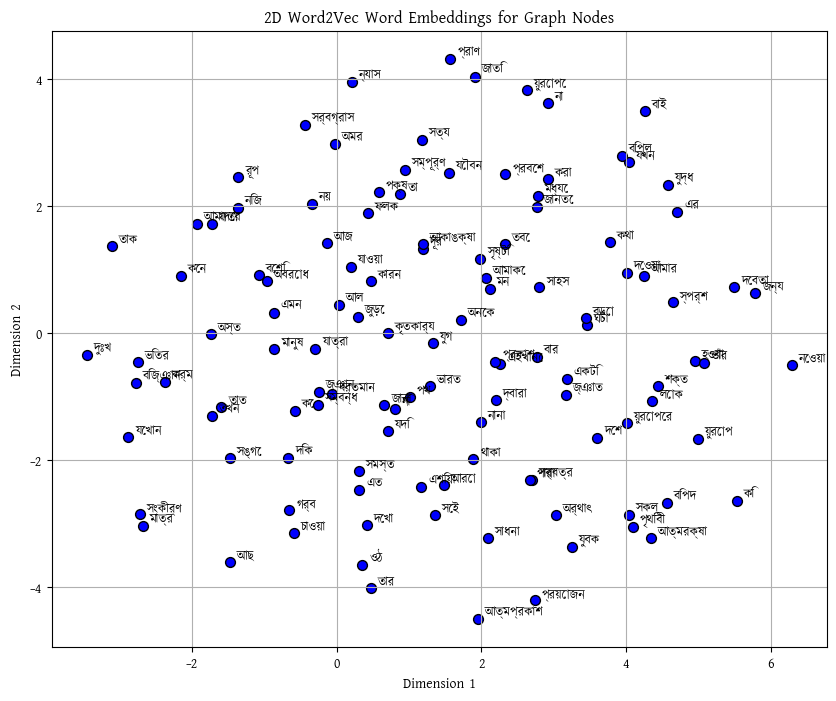

In [58]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
import numpy as np
import logging
from pathlib import Path
import matplotlib.font_manager as fm

# Logging setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Function to set up custom font for Bangla
def custom_font(font_path):
    try:
        font_path = Path(font_path)
        if not font_path.exists():
            logger.error(f"Font file not found: {font_path}")
            return None

        # Load and register the font
        font_prop = fm.FontProperties(fname=str(font_path))
        font_name = font_prop.get_name()
        fm.fontManager.addfont(str(font_path))

        plt.rcParams['font.family'] = font_name
        logger.info(f"Font loaded successfully: {font_name}")
        return font_name
    except Exception as e:
        logger.error(f"Error loading font: {e}")
        return None

# Function to check frequency of word pairs
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)
    for sentence in cleaned_sentences:
        words = sentence.split()
        unique_words = set(words)  # Get unique words in the sentence
        word_pairs = combinations(unique_words, 2)
        for pair in word_pairs:
            pair_frequency[pair] += 1
    return pair_frequency

# Function to create graph from word pairs with frequency > 1
def plot_word_pairs(pair_frequency, font_path):
    # Load custom Bangla font
    font_name = custom_font(font_path)
    if not font_name:
        logger.warning("Could not load font. Falling back to default font.")

    G = nx.Graph()
    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            G.add_edge(pair[0], pair[1], weight=frequency)

    # Print the total number of nodes
    total_nodes = len(G.nodes)
    print(f"Total number of nodes: {total_nodes}")  # Print total number of nodes

    return G

# Function to get Word2Vec embeddings for the words in the graph
def get_word2vec_embeddings(cleaned_sentences, graph_nodes, vector_size=100, window=5, min_count=1):
    # Split the cleaned sentences into lists of words
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]

    # Train the Word2Vec model
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)

    # Get the word vectors for the graph nodes (words involved in pairs)
    word_vectors = model.wv
    vectors = {word: word_vectors[word] for word in graph_nodes if word in word_vectors}

    return vectors

# Function to plot the Word2Vec embeddings in 2D using t-SNE
def plot_word_embeddings_2d(word_embeddings):
    # Reduce the dimensionality to 2D using t-SNE
    words = list(word_embeddings.keys())
    vectors = np.array(list(word_embeddings.values()))

    tsne = TSNE(n_components=2, random_state=42)
    vectors_2d = tsne.fit_transform(vectors)

    # Plot the words in the 2D space
    plt.figure(figsize=(10, 8))
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], marker='o', c='blue', edgecolor='k', s=50)

    # Annotate each word at its position
    for i, word in enumerate(words):
        plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), xytext=(5, 2), textcoords='offset points', fontsize=9)

    # Display the plot
    plt.title('2D Word2Vec Word Embeddings for Graph Nodes')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.grid(True)
    plt.show()

# Path to the Kalpurush font
font_path = 'kalpurush.ttf'


# Generate pair frequency
pair_frequency = check_pair_frequency(cleaned_sentences)

# Create graph from word pairs with frequency > 1
graph = plot_word_pairs(pair_frequency, font_path)

# Extract the nodes (unique words) from the graph
graph_nodes = list(graph.nodes)

# Get Word2Vec embeddings for the graph nodes (words involved in word pairs with frequency > 1)
word2vec_embeddings = get_word2vec_embeddings(cleaned_sentences, graph_nodes)

# Plot the Word2Vec embeddings for the graph nodes in 2D
plot_word_embeddings_2d(word2vec_embeddings)


# COSINE SIMILARITY

The cosine similarity between two vectors
𝐴
A and
𝐵
B is given by:

cosine similarity
(
𝐴
,
𝐵
)
=
𝐴
⋅
𝐵
∥
𝐴
∥
∥
𝐵
∥
cosine similarity(A,B)=
∥A∥∥B∥
A⋅B
​


In [59]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import logging
from pathlib import Path
import matplotlib.font_manager as fm

# Logging setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Function to set up custom font for Bangla
def custom_font(font_path):
    try:
        font_path = Path(font_path)
        if not font_path.exists():
            logger.error(f"Font file not found: {font_path}")
            return None

        # Load and register the font
        font_prop = fm.FontProperties(fname=str(font_path))
        font_name = font_prop.get_name()
        fm.fontManager.addfont(str(font_path))

        plt.rcParams['font.family'] = font_name
        logger.info(f"Font loaded successfully: {font_name}")
        return font_name
    except Exception as e:
        logger.error(f"Error loading font: {e}")
        return None

# Function to check frequency of word pairs
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)
    for sentence in cleaned_sentences:
        words = sentence.split()
        unique_words = set(words)  # Get unique words in the sentence
        word_pairs = combinations(unique_words, 2)
        for pair in word_pairs:
            pair_frequency[pair] += 1
    return pair_frequency

# Function to create graph from word pairs with frequency > 1
def plot_word_pairs(pair_frequency, font_path):
    # Load custom Bangla font
    font_name = custom_font(font_path)
    if not font_name:
        logger.warning("Could not load font. Falling back to default font.")

    G = nx.Graph()
    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            G.add_edge(pair[0], pair[1], weight=frequency)

    # Print the total number of nodes
    total_nodes = len(G.nodes)
    print(f"Total number of nodes: {total_nodes}")  # Print total number of nodes

    return G

# Function to get Word2Vec embeddings for the words in the graph
def get_word2vec_embeddings(cleaned_sentences, graph_nodes, vector_size=100, window=5, min_count=1):
    # Split the cleaned sentences into lists of words
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]

    # Train the Word2Vec model
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)

    # Get the word vectors for the graph nodes (words involved in pairs)
    word_vectors = model.wv
    vectors = {word: word_vectors[word] for word in graph_nodes if word in word_vectors}

    return vectors

# Function to calculate and print cosine similarities between words connected by edges
def print_cosine_similarities(graph, word_embeddings):
    total_similarities = 0
    similarities = []

    # Iterate over the edges of the graph
    for node1, node2 in graph.edges():
        if node1 in word_embeddings and node2 in word_embeddings:
            # Get the embeddings for the two nodes
            vec1 = word_embeddings[node1].reshape(1, -1)
            vec2 = word_embeddings[node2].reshape(1, -1)

            # Compute cosine similarity
            similarity = cosine_similarity(vec1, vec2)[0][0]
            similarities.append((node1, node2, similarity))

            total_similarities += 1

    # Print the cosine similarities for each pair
    for node1, node2, similarity in similarities:
        print(f"Cosine similarity between '{node1}' and '{node2}': {similarity:.4f}")

    # Print the total number of cosine similarities
    print(f"Total number of cosine similarities: {total_similarities}")


# Path to the Kalpurush font
font_path = 'kalpurush.ttf'



# Generate pair frequency
pair_frequency = check_pair_frequency(cleaned_sentences)

# Create graph from word pairs with frequency > 1
graph = plot_word_pairs(pair_frequency, font_path)

# Extract the nodes (unique words) from the graph
graph_nodes = list(graph.nodes)

# Get Word2Vec embeddings for the graph nodes (words involved in word pairs with frequency > 1)
word2vec_embeddings = get_word2vec_embeddings(cleaned_sentences, graph_nodes)

# Print cosine similarities for the words connected by edges
print_cosine_similarities(graph, word2vec_embeddings)


Total number of nodes: 117
Cosine similarity between 'তখন' and 'যখন': 0.0248
Cosine similarity between 'তখন' and 'করা': -0.0066
Cosine similarity between 'তখন' and 'শক্ত': -0.1279
Cosine similarity between 'তখন' and 'বার': -0.0534
Cosine similarity between 'তখন' and 'মানুষ': 0.1312
Cosine similarity between 'যখন' and 'করা': 0.1690
Cosine similarity between 'যখন' and 'সেই': -0.2287
Cosine similarity between 'যখন' and 'সংকীর্ণ': 0.0668
Cosine similarity between 'যখন' and 'শক্ত': -0.0024
Cosine similarity between 'যখন' and 'বার': 0.0185
Cosine similarity between 'যখন' and 'মানুষ': -0.1350
Cosine similarity between 'দেওয়া' and 'করা': 0.0463
Cosine similarity between 'দেওয়া' and 'দূর': 0.0250
Cosine similarity between 'দেওয়া' and 'হওয়া': 0.1624
Cosine similarity between 'দেওয়া' and 'মধ্যে': 0.0169
Cosine similarity between 'দেওয়া' and 'মানুষ': -0.0915
Cosine similarity between 'দেওয়া' and 'সত্য': -0.1324
Cosine similarity between 'দেওয়া' and 'প্রবেশ': -0.0674
Cosine similarity between 'দেওয়

# COSINE SIMILARITY >0.1

In [60]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import logging
from pathlib import Path
import matplotlib.font_manager as fm

# Logging setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Function to set up custom font for Bangla
def custom_font(font_path):
    try:
        font_path = Path(font_path)
        if not font_path.exists():
            logger.error(f"Font file not found: {font_path}")
            return None

        # Load and register the font
        font_prop = fm.FontProperties(fname=str(font_path))
        font_name = font_prop.get_name()
        fm.fontManager.addfont(str(font_path))

        plt.rcParams['font.family'] = font_name
        logger.info(f"Font loaded successfully: {font_name}")
        return font_name
    except Exception as e:
        logger.error(f"Error loading font: {e}")
        return None

# Function to check frequency of word pairs
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)
    for sentence in cleaned_sentences:
        words = sentence.split()
        unique_words = set(words)  # Get unique words in the sentence
        word_pairs = combinations(unique_words, 2)
        for pair in word_pairs:
            pair_frequency[pair] += 1
    return pair_frequency

# Function to create graph from word pairs with frequency > 1
def plot_word_pairs(pair_frequency, font_path):
    # Load custom Bangla font
    font_name = custom_font(font_path)
    if not font_name:
        logger.warning("Could not load font. Falling back to default font.")

    G = nx.Graph()
    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            G.add_edge(pair[0], pair[1], weight=frequency)

    # Print the total number of nodes
    total_nodes = len(G.nodes)
    print(f"Total number of nodes: {total_nodes}")  # Print total number of nodes

    return G

# Function to get Word2Vec embeddings for the words in the graph
def get_word2vec_embeddings(cleaned_sentences, graph_nodes, vector_size=100, window=5, min_count=1):
    # Split the cleaned sentences into lists of words
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]

    # Train the Word2Vec model
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)

    # Get the word vectors for the graph nodes (words involved in pairs)
    word_vectors = model.wv
    vectors = {word: word_vectors[word] for word in graph_nodes if word in word_vectors}

    return vectors

# Function to calculate and print cosine similarities between words connected by edges
def print_cosine_similarities(graph, word_embeddings, similarity_threshold=0.1):
    total_similarities = 0
    similarities = []

    # Iterate over the edges of the graph
    for node1, node2 in graph.edges():
        if node1 in word_embeddings and node2 in word_embeddings:
            # Get the embeddings for the two nodes
            vec1 = word_embeddings[node1].reshape(1, -1)
            vec2 = word_embeddings[node2].reshape(1, -1)

            # Compute cosine similarity
            similarity = cosine_similarity(vec1, vec2)[0][0]

            # Filter out similarities less than the threshold
            if similarity > similarity_threshold:
                similarities.append((node1, node2, similarity))
                total_similarities += 1

    # Print the cosine similarities for each pair
    for node1, node2, similarity in similarities:
        print(f"Cosine similarity between '{node1}' and '{node2}': {similarity:.4f}")

    # Print the total number of cosine similarities
    print(f"Total number of cosine similarities greater than {similarity_threshold}: {total_similarities}")


# Path to the Kalpurush font
font_path = 'kalpurush.ttf'

# Generate pair frequency
pair_frequency = check_pair_frequency(cleaned_sentences)

# Create graph from word pairs with frequency > 1
graph = plot_word_pairs(pair_frequency, font_path)

# Extract the nodes (unique words) from the graph
graph_nodes = list(graph.nodes)

# Get Word2Vec embeddings for the graph nodes (words involved in word pairs with frequency > 1)
word2vec_embeddings = get_word2vec_embeddings(cleaned_sentences, graph_nodes)

# Print cosine similarities greater than 0.1 for the words connected by edges
print_cosine_similarities(graph, word2vec_embeddings, similarity_threshold=0.1)


Total number of nodes: 117
Cosine similarity between 'তখন' and 'মানুষ': 0.1312
Cosine similarity between 'যখন' and 'করা': 0.1690
Cosine similarity between 'দেওয়া' and 'হওয়া': 0.1624
Cosine similarity between 'দেওয়া' and 'দেখা': 0.1914
Cosine similarity between 'দেওয়া' and 'দেবতা': 0.2327
Cosine similarity between 'করা' and 'নেওয়া': 0.1882
Cosine similarity between 'করা' and 'কথা': 0.1987
Cosine similarity between 'করা' and 'তাত': 0.1119
Cosine similarity between 'করা' and 'সকল': 0.1209
Cosine similarity between 'করা' and 'তা': 0.1070
Cosine similarity between 'করা' and 'আছ': 0.1136
Cosine similarity between 'করা' and 'দুঃখ': 0.1503
Cosine similarity between 'করা' and 'মন': 0.1558
Cosine similarity between 'করা' and 'শক্ত': 0.1264
Cosine similarity between 'করা' and 'কর্ম': 0.1159
Cosine similarity between 'করা' and 'মধ্যে': 0.2384
Cosine similarity between 'করা' and 'য়ুরোপে': 0.1071
Cosine similarity between 'করা' and 'যেখান': 0.1312
Cosine similarity between 'করা' and 'য়ুরোপের': 0.132

Total number of nodes: 117


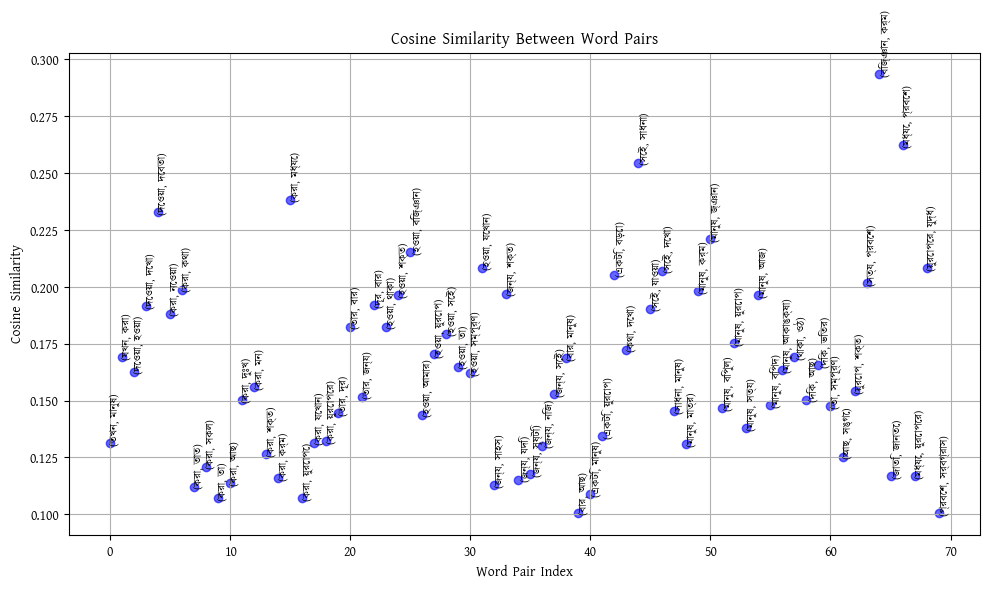

In [61]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import logging
from pathlib import Path
import matplotlib.font_manager as fm

# Logging setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Function to set up custom font for Bangla
def custom_font(font_path):
    try:
        font_path = Path(font_path)
        if not font_path.exists():
            logger.error(f"Font file not found: {font_path}")
            return None

        # Load and register the font
        font_prop = fm.FontProperties(fname=str(font_path))
        font_name = font_prop.get_name()
        fm.fontManager.addfont(str(font_path))

        plt.rcParams['font.family'] = font_name
        logger.info(f"Font loaded successfully: {font_name}")
        return font_name
    except Exception as e:
        logger.error(f"Error loading font: {e}")
        return None

# Function to check frequency of word pairs
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)
    for sentence in cleaned_sentences:
        words = sentence.split()
        unique_words = set(words)  # Get unique words in the sentence
        word_pairs = combinations(unique_words, 2)
        for pair in word_pairs:
            pair_frequency[pair] += 1
    return pair_frequency

# Function to create graph from word pairs with frequency > 1
def plot_word_pairs(pair_frequency, font_path):
    # Load custom Bangla font
    font_name = custom_font(font_path)
    if not font_name:
        logger.warning("Could not load font. Falling back to default font.")

    G = nx.Graph()
    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            G.add_edge(pair[0], pair[1], weight=frequency)

    # Print the total number of nodes
    total_nodes = len(G.nodes)
    print(f"Total number of nodes: {total_nodes}")  # Print total number of nodes

    return G

# Function to get Word2Vec embeddings for the words in the graph
def get_word2vec_embeddings(cleaned_sentences, graph_nodes, vector_size=100, window=5, min_count=1):
    # Split the cleaned sentences into lists of words
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]

    # Train the Word2Vec model
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)

    # Get the word vectors for the graph nodes (words involved in pairs)
    word_vectors = model.wv
    vectors = {word: word_vectors[word] for word in graph_nodes if word in word_vectors}

    return vectors

# Function to calculate and store cosine similarities between words connected by edges
def get_cosine_similarities(graph, word_embeddings, similarity_threshold=0.1):
    similarities = []

    # Iterate over the edges of the graph
    for node1, node2 in graph.edges():
        if node1 in word_embeddings and node2 in word_embeddings:
            # Get the embeddings for the two nodes
            vec1 = word_embeddings[node1].reshape(1, -1)
            vec2 = word_embeddings[node2].reshape(1, -1)

            # Compute cosine similarity
            similarity = cosine_similarity(vec1, vec2)[0][0]

            # Filter out similarities less than the threshold
            if similarity > similarity_threshold:
                similarities.append((node1, node2, similarity))

    return similarities

# Function to plot the cosine similarities
def plot_cosine_similarities(similarities):
    # Extract the word pairs and their corresponding cosine similarities
    words1 = [pair[0] for pair in similarities]
    words2 = [pair[1] for pair in similarities]
    cosine_vals = [pair[2] for pair in similarities]

    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(cosine_vals)), cosine_vals, color='blue', alpha=0.6)

    # Annotate each point with the word pairs
    for i, (w1, w2) in enumerate(zip(words1, words2)):
        plt.text(i, cosine_vals[i], f"({w1}, {w2})", fontsize=8, rotation=90)

    # Set the labels and title
    plt.xlabel('Word Pair Index')
    plt.ylabel('Cosine Similarity')
    plt.title('Cosine Similarity Between Word Pairs')
    plt.grid(True)
    plt.tight_layout()

    # Show the plot
    plt.show()

# Path to the Kalpurush font
font_path = 'kalpurush.ttf'

# Generate pair frequency
pair_frequency = check_pair_frequency(cleaned_sentences)

# Create graph from word pairs with frequency > 1
graph = plot_word_pairs(pair_frequency, font_path)

# Extract the nodes (unique words) from the graph
graph_nodes = list(graph.nodes)

# Get Word2Vec embeddings for the graph nodes (words involved in word pairs with frequency > 1)
word2vec_embeddings = get_word2vec_embeddings(cleaned_sentences, graph_nodes)

# Get the cosine similarities between the words with edges
similarities = get_cosine_similarities(graph, word2vec_embeddings, similarity_threshold=0.1)

# Plot the cosine similarities
plot_cosine_similarities(similarities)


Total number of nodes: 56


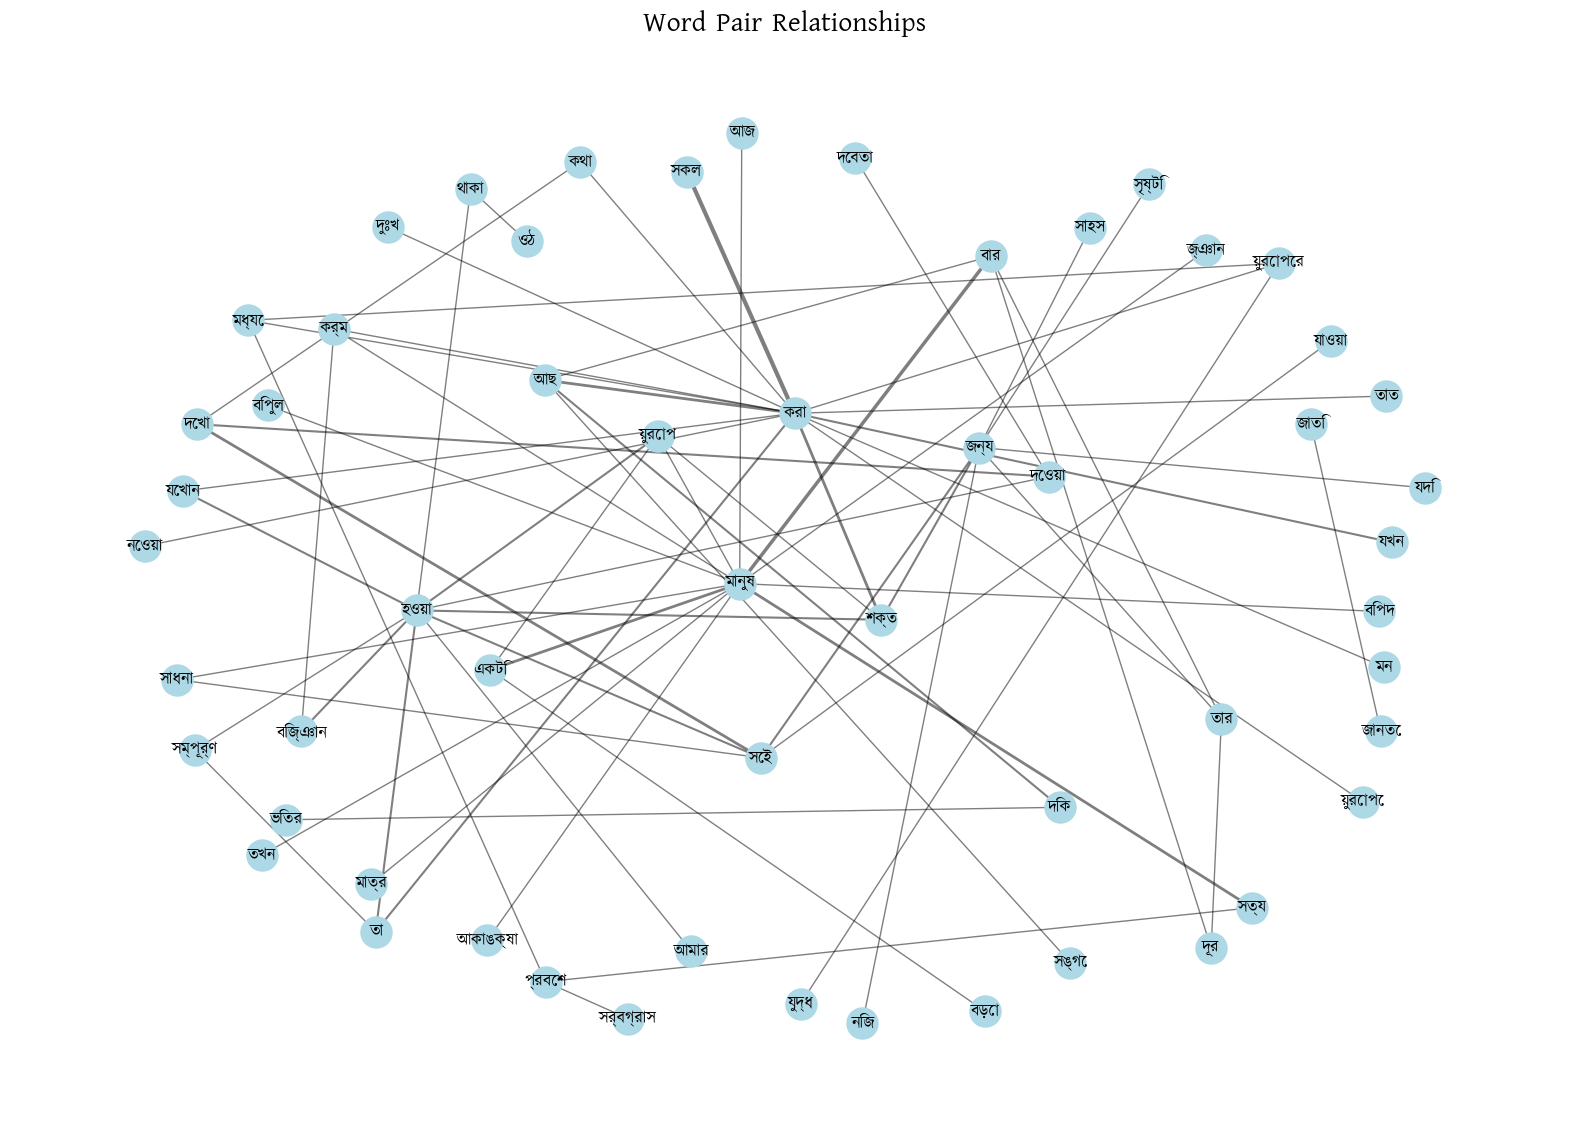

In [62]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity
import logging
from pathlib import Path
import matplotlib.font_manager as fm
from gensim.models import Word2Vec

# Logging setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Function to set up custom font for Bangla
def custom_font(font_path):
    try:
        font_path = Path(font_path)
        if not font_path.exists():
            logger.error(f"Font file not found: {font_path}")
            return None

        # Load and register the font
        font_prop = fm.FontProperties(fname=str(font_path))
        font_name = font_prop.get_name()
        fm.fontManager.addfont(str(font_path))

        plt.rcParams['font.family'] = font_name
        logger.info(f"Font loaded successfully: {font_name}")
        return font_name
    except Exception as e:
        logger.error(f"Error loading font: {e}")
        return None

# Function to check frequency of word pairs
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)
    for sentence in cleaned_sentences:
        words = sentence.split()
        unique_words = set(words)  # Get unique words in the sentence
        word_pairs = combinations(unique_words, 2)
        for pair in word_pairs:
            pair_frequency[pair] += 1
    return pair_frequency

# Function to create graph from word pairs with frequency > 1 and cosine similarity > 0.1
def plot_nodes(pair_frequency, word_embeddings, font_path, similarity_threshold=0.1):
    # Load custom Bangla font
    font_name = custom_font(font_path)
    if not font_name:
        logger.warning("Could not load font. Falling back to default font.")

    G = nx.Graph()

    # Add edges only for word pairs that have cosine similarity > 0.1 and frequency > 1
    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            node1, node2 = pair
            if node1 in word_embeddings and node2 in word_embeddings:
                # Calculate cosine similarity
                vec1 = word_embeddings[node1].reshape(1, -1)
                vec2 = word_embeddings[node2].reshape(1, -1)
                similarity = cosine_similarity(vec1, vec2)[0][0]

                if similarity > similarity_threshold:
                    G.add_edge(node1, node2, weight=frequency, similarity=similarity)

    # Print the total number of nodes
    total_nodes = len(G.nodes)
    print(f"Total number of nodes: {total_nodes}")  # Print total number of nodes

    # Positioning of nodes using spring layout
    pos = nx.spring_layout(G, k=2)
    weights = nx.get_edge_attributes(G, 'weight').values()

    plt.figure(figsize=(20, 14))

    # Draw network nodes with light blue color
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')

    # Draw edges with widths proportional to their weight
    nx.draw_networkx_edges(G, pos, width=[w / 2 for w in weights], alpha=0.5)

    # Draw node labels using the custom Bangla font
    nx.draw_networkx_labels(G, pos, font_size=12, font_family=plt.rcParams['font.family'])

    # Set title and axis
    plt.title('Word Pair Relationships', fontdict={'fontsize': 20, 'fontweight': 'bold'}, fontfamily=plt.rcParams['font.family'])
    plt.axis('off')

    # Show the plot
    plt.show()

# Function to get Word2Vec embeddings for the words in the graph
def get_word2vec_embeddings(cleaned_sentences, graph_nodes, vector_size=100, window=5, min_count=1):
    # Split the cleaned sentences into lists of words
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]

    # Train the Word2Vec model
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)

    # Get the word vectors for the graph nodes (words involved in pairs)
    word_vectors = model.wv
    vectors = {word: word_vectors[word] for word in graph_nodes if word in word_vectors}

    return vectors

# Path to the Kalpurush font
font_path = 'kalpurush.ttf'

# Generate pair frequency
pair_frequency = check_pair_frequency(cleaned_sentences)

# Create graph from word pairs with frequency > 1
# Extract the nodes (unique words) from the pair frequency
graph_nodes = list(set([node for pair in pair_frequency for node in pair]))

# Get Word2Vec embeddings for the graph nodes (words involved in word pairs with frequency > 1)
word2vec_embeddings = get_word2vec_embeddings(cleaned_sentences, graph_nodes)

# Plot nodes with Bangla labels for word pairs with cosine similarity > 0.1
plot_nodes(pair_frequency, word2vec_embeddings, font_path, similarity_threshold=0.1)


# DEGREE
### In graph theory, the degree (or valency) of a vertex of a graph is the number of edges that are incident to the vertex; in a multigraph, a loop contributes 2 to a vertex's degree, for the two ends of the edge.[1] The degree of a vertex
v
{\displaystyle v} is denoted
deg
⁡
(
v
)
{\displaystyle \deg(v)} or
deg
⁡
v
{\displaystyle \deg v}. The maximum degree of a graph
G
{\displaystyle G} is denoted by
Δ
(
G
)
{\displaystyle \Delta (G)}, and is the maximum of
G
{\displaystyle G}'s vertices' degrees. The minimum degree of a graph is denoted by
δ
(
G
)
{\displaystyle \delta (G)}, and is the minimum of
G
{\displaystyle G}'s vertices' degrees. In the multigraph shown on the right, the maximum degree is 5 and the minimum degree is 0.

### MAX DEGREE

Total number of nodes: 56
The node with the highest degree is: করা with degree 15


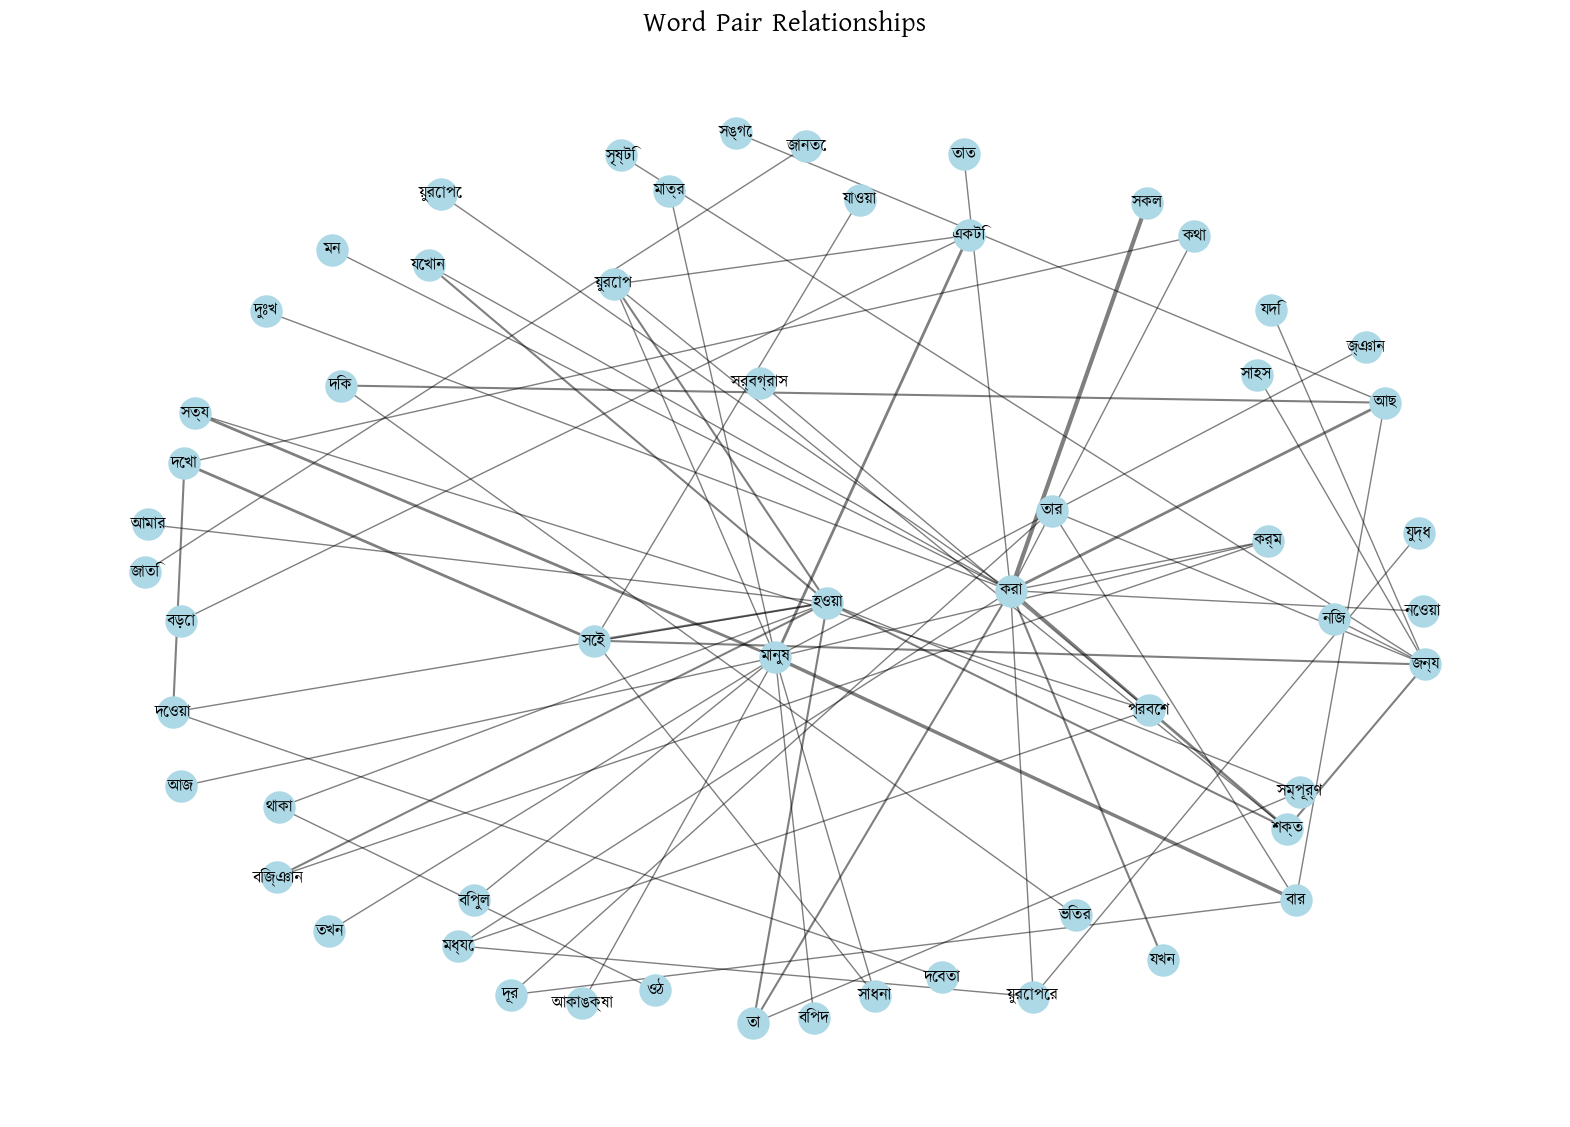

In [63]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity
import logging
from pathlib import Path
import matplotlib.font_manager as fm
from gensim.models import Word2Vec

# Logging setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Function to set up custom font for Bangla
def custom_font(font_path):
    try:
        font_path = Path(font_path)
        if not font_path.exists():
            logger.error(f"Font file not found: {font_path}")
            return None

        # Load and register the font
        font_prop = fm.FontProperties(fname=str(font_path))
        font_name = font_prop.get_name()
        fm.fontManager.addfont(str(font_path))

        plt.rcParams['font.family'] = font_name
        logger.info(f"Font loaded successfully: {font_name}")
        return font_name
    except Exception as e:
        logger.error(f"Error loading font: {e}")
        return None

# Function to check frequency of word pairs
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)
    for sentence in cleaned_sentences:
        words = sentence.split()
        unique_words = set(words)  # Get unique words in the sentence
        word_pairs = combinations(unique_words, 2)
        for pair in word_pairs:
            pair_frequency[pair] += 1
    return pair_frequency

# Function to create graph from word pairs with frequency > 1 and cosine similarity > 0.1
def plot_nodes(pair_frequency, word_embeddings, font_path, similarity_threshold=0.1):
    # Load custom Bangla font
    font_name = custom_font(font_path)
    if not font_name:
        logger.warning("Could not load font. Falling back to default font.")

    G = nx.Graph()

    # Add edges only for word pairs that have cosine similarity > 0.1 and frequency > 1
    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            node1, node2 = pair
            if node1 in word_embeddings and node2 in word_embeddings:
                # Calculate cosine similarity
                vec1 = word_embeddings[node1].reshape(1, -1)
                vec2 = word_embeddings[node2].reshape(1, -1)
                similarity = cosine_similarity(vec1, vec2)[0][0]

                if similarity > similarity_threshold:
                    G.add_edge(node1, node2, weight=frequency, similarity=similarity)

    # Print the total number of nodes
    total_nodes = len(G.nodes)
    print(f"Total number of nodes: {total_nodes}")  # Print total number of nodes

    # Find and print the node with the highest degree
    highest_degree_node = max(G.degree(), key=lambda x: x[1])  # Find the node with the highest degree
    print(f"The node with the highest degree is: {highest_degree_node[0]} with degree {highest_degree_node[1]}")

    # Positioning of nodes using spring layout
    pos = nx.spring_layout(G, k=2)
    weights = nx.get_edge_attributes(G, 'weight').values()

    plt.figure(figsize=(20, 14))

    # Draw network nodes with light blue color
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')

    # Draw edges with widths proportional to their weight
    nx.draw_networkx_edges(G, pos, width=[w / 2 for w in weights], alpha=0.5)

    # Draw node labels using the custom Bangla font
    nx.draw_networkx_labels(G, pos, font_size=12, font_family=plt.rcParams['font.family'])

    # Set title and axis
    plt.title('Word Pair Relationships', fontdict={'fontsize': 20, 'fontweight': 'bold'}, fontfamily=plt.rcParams['font.family'])
    plt.axis('off')

    # Show the plot
    plt.show()

# Function to get Word2Vec embeddings for the words in the graph
def get_word2vec_embeddings(cleaned_sentences, graph_nodes, vector_size=100, window=5, min_count=1):
    # Split the cleaned sentences into lists of words
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]

    # Train the Word2Vec model
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)

    # Get the word vectors for the graph nodes (words involved in pairs)
    word_vectors = model.wv
    vectors = {word: word_vectors[word] for word in graph_nodes if word in word_vectors}

    return vectors

# Path to the Kalpurush font
font_path = 'kalpurush.ttf'

# Generate pair frequency
pair_frequency = check_pair_frequency(cleaned_sentences)

# Create graph from word pairs with frequency > 1
# Extract the nodes (unique words) from the pair frequency
graph_nodes = list(set([node for pair in pair_frequency for node in pair]))

# Get Word2Vec embeddings for the graph nodes (words involved in word pairs with frequency > 1)
word2vec_embeddings = get_word2vec_embeddings(cleaned_sentences, graph_nodes)

# Plot nodes with Bangla labels for word pairs with cosine similarity > 0.1
plot_nodes(pair_frequency, word2vec_embeddings, font_path, similarity_threshold=0.1)


Total number of nodes: 56
The node with the highest degree is: করা with degree 15


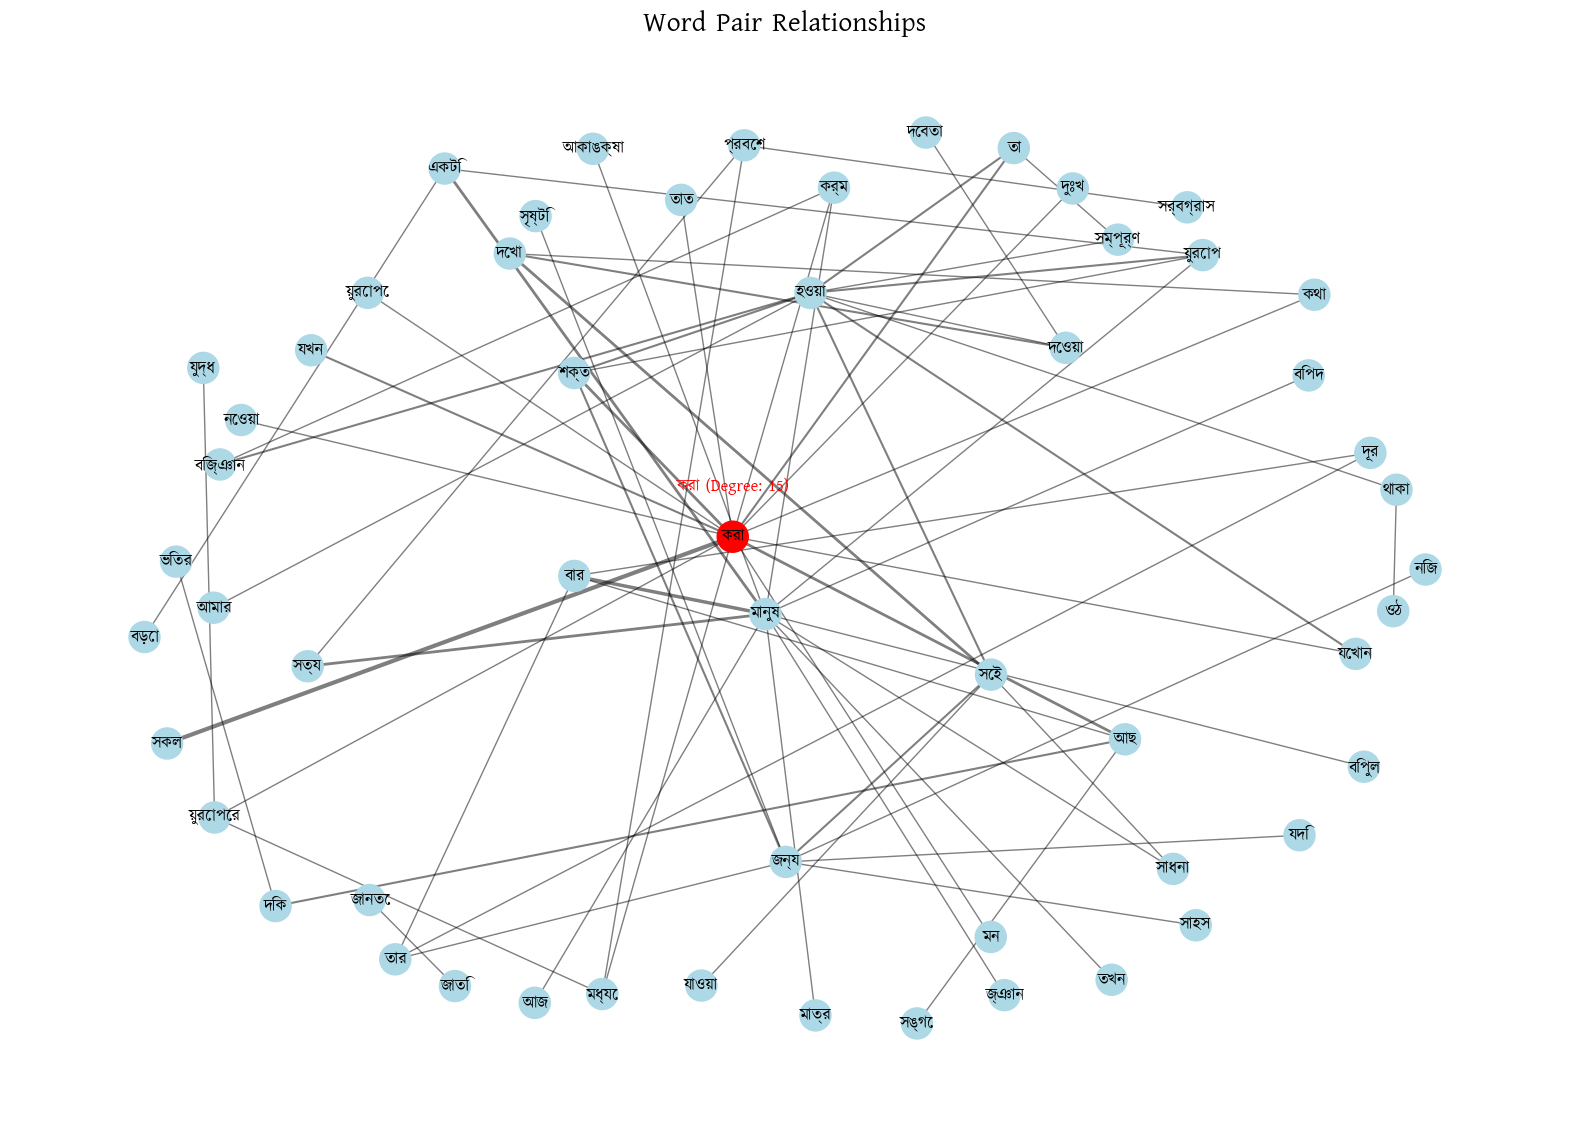

In [64]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity
import logging
from pathlib import Path
import matplotlib.font_manager as fm
from gensim.models import Word2Vec

# Logging setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Function to set up custom font for Bangla
def custom_font(font_path):
    try:
        font_path = Path(font_path)
        if not font_path.exists():
            logger.error(f"Font file not found: {font_path}")
            return None

        # Load and register the font
        font_prop = fm.FontProperties(fname=str(font_path))
        font_name = font_prop.get_name()
        fm.fontManager.addfont(str(font_path))

        plt.rcParams['font.family'] = font_name
        logger.info(f"Font loaded successfully: {font_name}")
        return font_name
    except Exception as e:
        logger.error(f"Error loading font: {e}")
        return None

# Function to check frequency of word pairs
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)
    for sentence in cleaned_sentences:
        words = sentence.split()
        unique_words = set(words)  # Get unique words in the sentence
        word_pairs = combinations(unique_words, 2)
        for pair in word_pairs:
            pair_frequency[pair] += 1
    return pair_frequency

# Function to create graph from word pairs with frequency > 1 and cosine similarity > 0.1
def plot_nodes(pair_frequency, word_embeddings, font_path, similarity_threshold=0.1):
    # Load custom Bangla font
    font_name = custom_font(font_path)
    if not font_name:
        logger.warning("Could not load font. Falling back to default font.")

    G = nx.Graph()

    # Add edges only for word pairs that have cosine similarity > 0.1 and frequency > 1
    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            node1, node2 = pair
            if node1 in word_embeddings and node2 in word_embeddings:
                # Calculate cosine similarity
                vec1 = word_embeddings[node1].reshape(1, -1)
                vec2 = word_embeddings[node2].reshape(1, -1)
                similarity = cosine_similarity(vec1, vec2)[0][0]

                if similarity > similarity_threshold:
                    G.add_edge(node1, node2, weight=frequency, similarity=similarity)

    # Find the node with the highest degree
    highest_degree_node = max(G.degree(), key=lambda x: x[1])

    # Print the total number of nodes and the node with the highest degree
    total_nodes = len(G.nodes)
    print(f"Total number of nodes: {total_nodes}")  # Print total number of nodes
    print(f"The node with the highest degree is: {highest_degree_node[0]} with degree {highest_degree_node[1]}")

    # Positioning of nodes using spring layout
    pos = nx.spring_layout(G, k=2)
    weights = nx.get_edge_attributes(G, 'weight').values()

    plt.figure(figsize=(20, 14))

    # Draw network nodes with light blue color
    node_colors = ['red' if node == highest_degree_node[0] else 'lightblue' for node in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_colors)

    # Draw edges with widths proportional to their weight
    nx.draw_networkx_edges(G, pos, width=[w / 2 for w in weights], alpha=0.5)

    # Draw node labels using the custom Bangla font
    nx.draw_networkx_labels(G, pos, font_size=12, font_family=plt.rcParams['font.family'])

    # Annotate the highest degree node
    plt.text(
        pos[highest_degree_node[0]][0],
        pos[highest_degree_node[0]][1] + 0.1,
        f"{highest_degree_node[0]} (Degree: {highest_degree_node[1]})",
        fontsize=12, color='red', ha='center'
    )

    # Set title and axis
    plt.title('Word Pair Relationships', fontdict={'fontsize': 20, 'fontweight': 'bold'}, fontfamily=plt.rcParams['font.family'])
    plt.axis('off')

    # Show the plot
    plt.show()

# Function to get Word2Vec embeddings for the words in the graph
def get_word2vec_embeddings(cleaned_sentences, graph_nodes, vector_size=100, window=5, min_count=1):
    # Split the cleaned sentences into lists of words
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]

    # Train the Word2Vec model
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)

    # Get the word vectors for the graph nodes (words involved in pairs)
    word_vectors = model.wv
    vectors = {word: word_vectors[word] for word in graph_nodes if word in word_vectors}

    return vectors

# Example usage
# Path to the Kalpurush font (replace with your font path)
font_path = 'kalpurush.ttf'


# Generate pair frequency
pair_frequency = check_pair_frequency(cleaned_sentences)

# Create graph from word pairs with frequency > 1
# Extract the nodes (unique words) from the pair frequency
graph_nodes = list(set([node for pair in pair_frequency for node in pair]))

# Get Word2Vec embeddings for the graph nodes (words involved in word pairs with frequency > 1)
word2vec_embeddings = get_word2vec_embeddings(cleaned_sentences, graph_nodes)

# Plot nodes with Bangla labels for word pairs with cosine similarity > 0.1
plot_nodes(pair_frequency, word2vec_embeddings, font_path, similarity_threshold=0.1)


### MIN DEGREE ( MINIMUM DEGEEE NODE THAT IS NOT 0)

The node with the lowest degree that is not zero is: যখন with degree 1


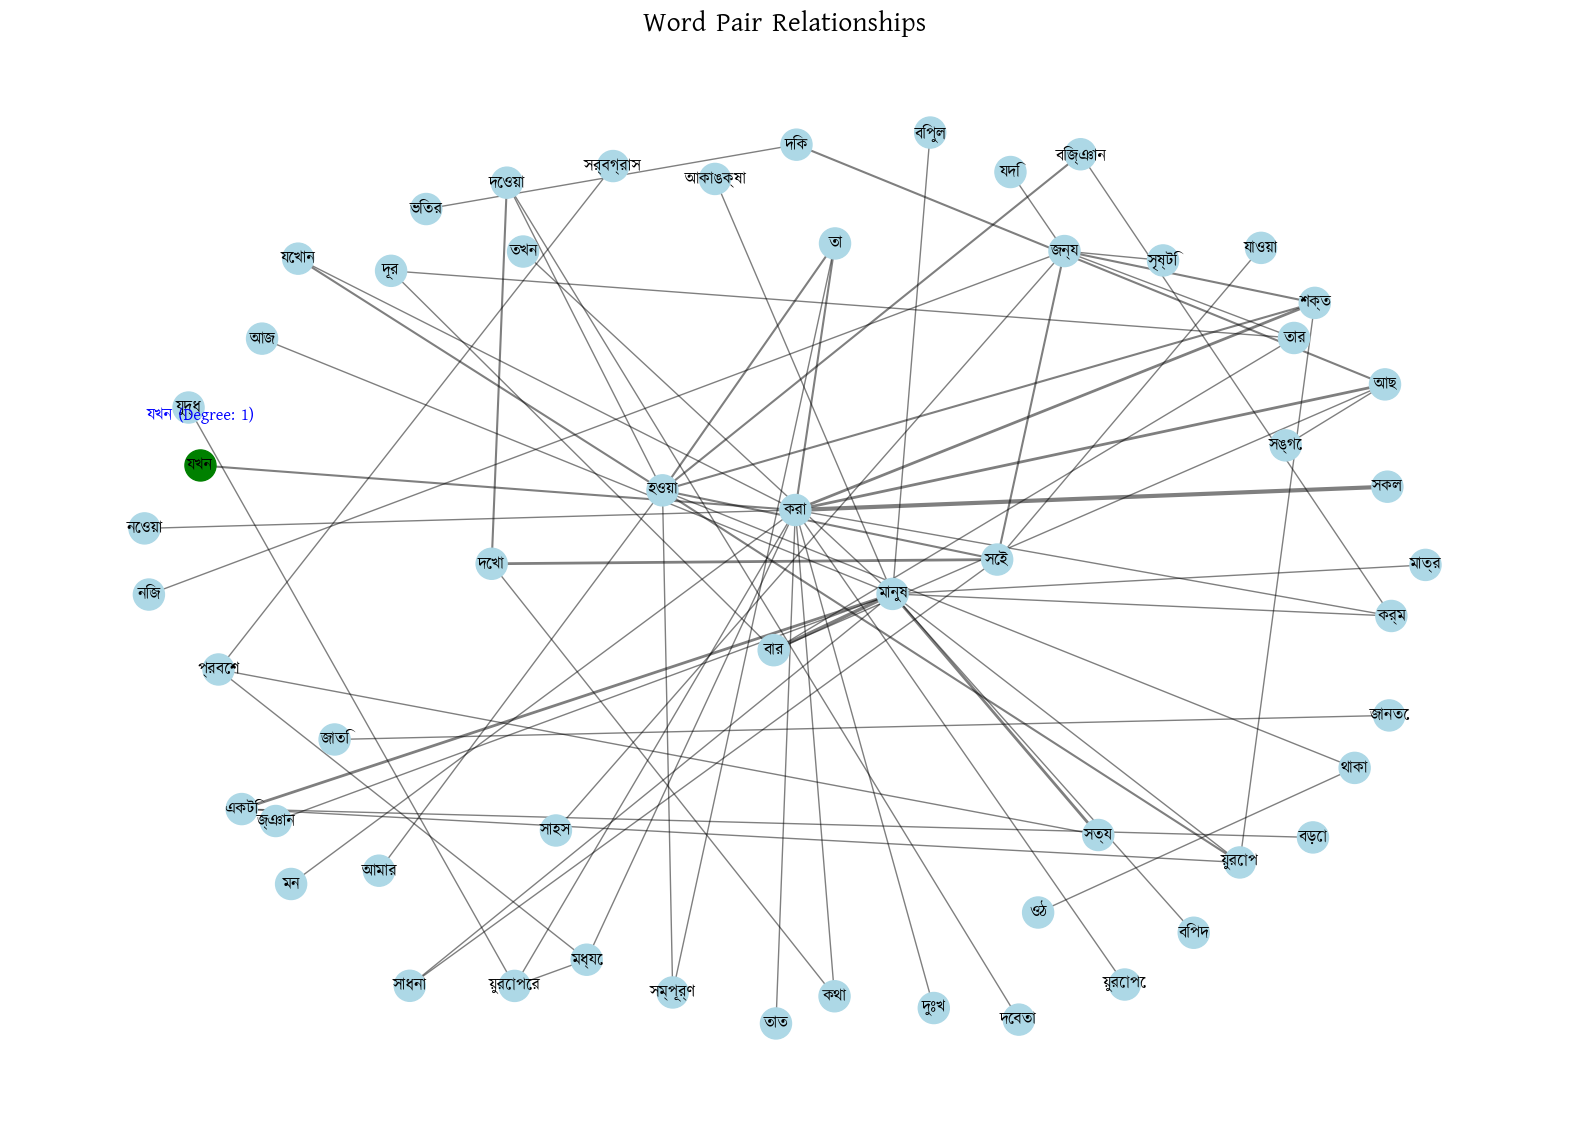

In [65]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity
import logging
from pathlib import Path
import matplotlib.font_manager as fm
from gensim.models import Word2Vec

# Logging setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Function to set up custom font for Bangla
def custom_font(font_path):
    try:
        font_path = Path(font_path)
        if not font_path.exists():
            logger.error(f"Font file not found: {font_path}")
            return None

        # Load and register the font
        font_prop = fm.FontProperties(fname=str(font_path))
        font_name = font_prop.get_name()
        fm.fontManager.addfont(str(font_path))

        plt.rcParams['font.family'] = font_name
        logger.info(f"Font loaded successfully: {font_name}")
        return font_name
    except Exception as e:
        logger.error(f"Error loading font: {e}")
        return None

# Function to check frequency of word pairs
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)
    for sentence in cleaned_sentences:
        words = sentence.split()
        unique_words = set(words)  # Get unique words in the sentence
        word_pairs = combinations(unique_words, 2)
        for pair in word_pairs:
            pair_frequency[pair] += 1
    return pair_frequency

# Function to create graph from word pairs with frequency > 1 and cosine similarity > 0.1
def plot_nodes(pair_frequency, word_embeddings, font_path, similarity_threshold=0.1):
    # Load custom Bangla font
    font_name = custom_font(font_path)
    if not font_name:
        logger.warning("Could not load font. Falling back to default font.")

    G = nx.Graph()

    # Add edges only for word pairs that have cosine similarity > 0.1 and frequency > 1
    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            node1, node2 = pair
            if node1 in word_embeddings and node2 in word_embeddings:
                # Calculate cosine similarity
                vec1 = word_embeddings[node1].reshape(1, -1)
                vec2 = word_embeddings[node2].reshape(1, -1)
                similarity = cosine_similarity(vec1, vec2)[0][0]

                if similarity > similarity_threshold:
                    G.add_edge(node1, node2, weight=frequency, similarity=similarity)

    # Find the node with the lowest degree that is not zero
    lowest_degree_node = find_lowest_degree_nonzero(G)
    if lowest_degree_node:
        print(f"The node with the lowest degree that is not zero is: {lowest_degree_node[0]} with degree {lowest_degree_node[1]}")
    else:
        print("No nodes with non-zero degree.")

    # Positioning of nodes using spring layout
    pos = nx.spring_layout(G, k=2)
    weights = nx.get_edge_attributes(G, 'weight').values()

    plt.figure(figsize=(20, 14))

    # Draw network nodes with light blue color and highlight the lowest degree node
    node_colors = ['lightblue' if node != lowest_degree_node[0] else 'green' for node in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_colors)

    # Draw edges with widths proportional to their weight
    nx.draw_networkx_edges(G, pos, width=[w / 2 for w in weights], alpha=0.5)

    # Draw node labels using the custom Bangla font
    nx.draw_networkx_labels(G, pos, font_size=12, font_family=plt.rcParams['font.family'])

    # Annotate the lowest degree node
    if lowest_degree_node:
        plt.text(
            pos[lowest_degree_node[0]][0],
            pos[lowest_degree_node[0]][1] + 0.1,
            f"{lowest_degree_node[0]} (Degree: {lowest_degree_node[1]})",
            fontsize=12, color='blue', ha='center'
        )

    # Set title and axis
    plt.title('Word Pair Relationships', fontdict={'fontsize': 20, 'fontweight': 'bold'}, fontfamily=plt.rcParams['font.family'])
    plt.axis('off')

    # Show the plot
    plt.show()

# Function to find the node with the lowest degree that is not zero
def find_lowest_degree_nonzero(G):
    # Initialize variables to track the node with the lowest non-zero degree
    lowest_degree_node = None
    lowest_degree = float('inf')

    # Iterate through all nodes and check their degree
    for node, degree in G.degree():
        if degree > 0 and degree < lowest_degree:  # Ignore nodes with degree 0
            lowest_degree = degree
            lowest_degree_node = (node, degree)

    return lowest_degree_node

# Function to get Word2Vec embeddings for the words in the graph
def get_word2vec_embeddings(cleaned_sentences, graph_nodes, vector_size=100, window=5, min_count=1):
    # Split the cleaned sentences into lists of words
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]

    # Train the Word2Vec model
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)

    # Get the word vectors for the graph nodes (words involved in pairs)
    word_vectors = model.wv
    vectors = {word: word_vectors[word] for word in graph_nodes if word in word_vectors}

    return vectors

# Example usage
# Path to the Kalpurush font (replace with your font path)
font_path = 'kalpurush.ttf'


# Generate pair frequency
pair_frequency = check_pair_frequency(cleaned_sentences)

# Create graph from word pairs with frequency > 1
# Extract the nodes (unique words) from the pair frequency
graph_nodes = list(set([node for pair in pair_frequency for node in pair]))

# Get Word2Vec embeddings for the graph nodes (words involved in word pairs with frequency > 1)
word2vec_embeddings = get_word2vec_embeddings(cleaned_sentences, graph_nodes)

# Plot nodes with Bangla labels for word pairs with cosine similarity > 0.1
plot_nodes(pair_frequency, word2vec_embeddings, font_path, similarity_threshold=0.1)


# CHROMATIC NUMBER

Total number of nodes: 56
Chromatic number: 3


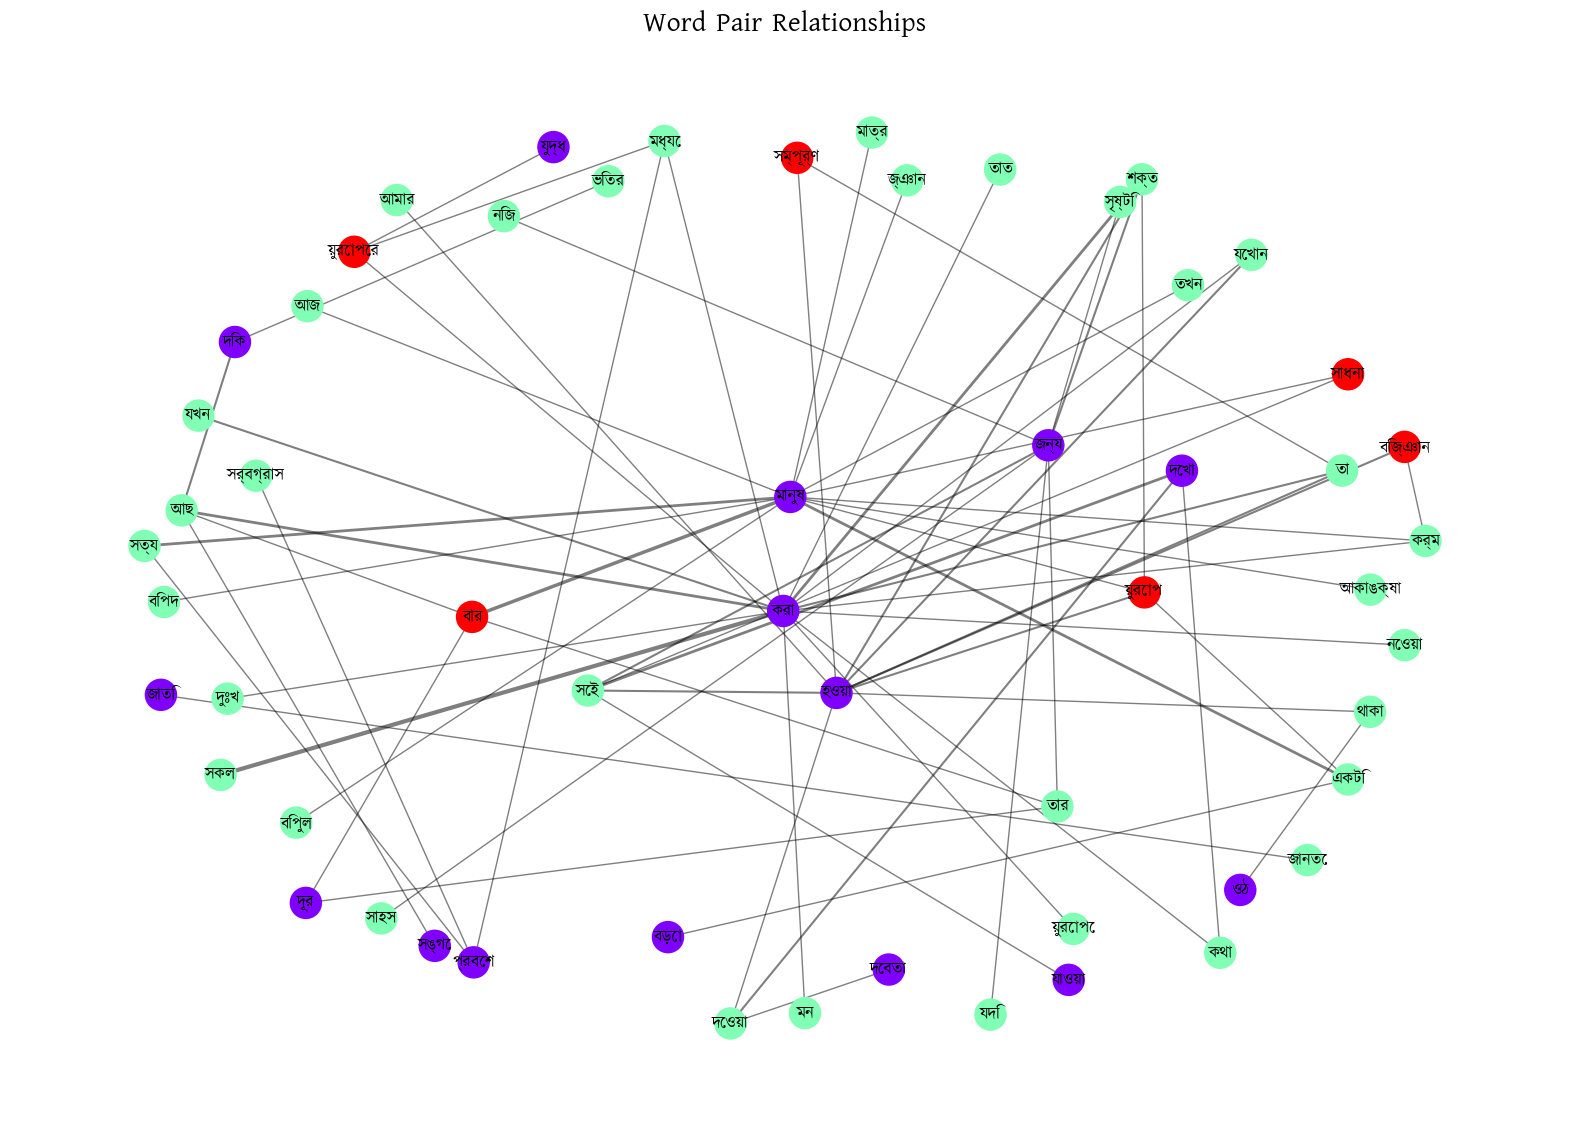

In [66]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity
import logging
from pathlib import Path
import matplotlib.font_manager as fm
from gensim.models import Word2Vec

# Logging setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Function to set up custom font for Bangla
def custom_font(font_path):
    try:
        font_path = Path(font_path)
        if not font_path.exists():
            logger.error(f"Font file not found: {font_path}")
            return None

        # Load and register the font
        font_prop = fm.FontProperties(fname=str(font_path))
        font_name = font_prop.get_name()
        fm.fontManager.addfont(str(font_path))

        plt.rcParams['font.family'] = font_name
        logger.info(f"Font loaded successfully: {font_name}")
        return font_name
    except Exception as e:
        logger.error(f"Error loading font: {e}")
        return None

# Function to check frequency of word pairs
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)
    for sentence in cleaned_sentences:
        words = sentence.split()
        unique_words = set(words)  # Get unique words in the sentence
        word_pairs = combinations(unique_words, 2)
        for pair in word_pairs:
            pair_frequency[pair] += 1
    return pair_frequency

# Function to create graph from word pairs with frequency > 1 and cosine similarity > 0.1
def plot_nodes(pair_frequency, word_embeddings, font_path, similarity_threshold=0.1):
    # Load custom Bangla font
    font_name = custom_font(font_path)
    if not font_name:
        logger.warning("Could not load font. Falling back to default font.")

    G = nx.Graph()

    # Add edges only for word pairs that have cosine similarity > 0.1 and frequency > 1
    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            node1, node2 = pair
            if node1 in word_embeddings and node2 in word_embeddings:
                # Calculate cosine similarity
                vec1 = word_embeddings[node1].reshape(1, -1)
                vec2 = word_embeddings[node2].reshape(1, -1)
                similarity = cosine_similarity(vec1, vec2)[0][0]

                if similarity > similarity_threshold:
                    G.add_edge(node1, node2, weight=frequency, similarity=similarity)

    # Print the total number of nodes
    total_nodes = len(G.nodes)
    print(f"Total number of nodes: {total_nodes}")  # Print total number of nodes

    # # Find and print the node with the highest degree
    # highest_degree_node = max(G.degree(), key=lambda x: x[1])  # Find the node with the highest degree
    # print(f"The node with the highest degree is: {highest_degree_node[0]} with degree {highest_degree_node[1]}")

    # Calculate the chromatic number using greedy coloring
    color_map = nx.coloring.greedy_color(G, strategy='largest_first')
    chromatic_number = max(color_map.values()) + 1  # Chromatic number is the max color index + 1
    print(f"Chromatic number: {chromatic_number}")

    # Positioning of nodes using spring layout
    pos = nx.spring_layout(G, k=2)
    weights = nx.get_edge_attributes(G, 'weight').values()

    # Draw the graph
    plt.figure(figsize=(20, 14))

    # Draw network nodes with colors based on their assigned color
    node_colors = [color_map[node] for node in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_colors, cmap=plt.cm.rainbow)

    # Draw edges with widths proportional to their weight
    nx.draw_networkx_edges(G, pos, width=[w / 2 for w in weights], alpha=0.5)

    # Draw labels with Bangla font
    nx.draw_networkx_labels(G, pos, font_size=12, font_family=plt.rcParams['font.family'])

    plt.title('Word Pair Relationships', fontdict={'fontsize': 20, 'fontweight': 'bold'}, fontfamily=plt.rcParams['font.family'])
    plt.axis('off')
    plt.show()

# Function to get Word2Vec embeddings for the words in the graph
def get_word2vec_embeddings(cleaned_sentences, graph_nodes, vector_size=100, window=5, min_count=1):
    # Split the cleaned sentences into lists of words
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]

    # Train the Word2Vec model
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)

    # Get the word vectors for the graph nodes (words involved in pairs)
    word_vectors = model.wv
    vectors = {word: word_vectors[word] for word in graph_nodes if word in word_vectors}

    return vectors

# Path to the Kalpurush font (replace with your font path)
font_path = 'kalpurush.ttf'

# Generate pair frequency
pair_frequency = check_pair_frequency(cleaned_sentences)

# Create graph from word pairs with frequency > 1
# Extract the nodes (unique words) from the pair frequency
graph_nodes = list(set([node for pair in pair_frequency for node in pair]))

# Get Word2Vec embeddings for the graph nodes (words involved in word pairs with frequency > 1)
word2vec_embeddings = get_word2vec_embeddings(cleaned_sentences, graph_nodes)

# Plot nodes with Bangla labels for word pairs with cosine similarity > 0.1
plot_nodes(pair_frequency, word2vec_embeddings, font_path, similarity_threshold=0.1)


# CHROMATIC INDEX

In [67]:
!pip install --upgrade networkx

Total number of nodes: 56
Chromatic number: 3
Chromatic index: 70


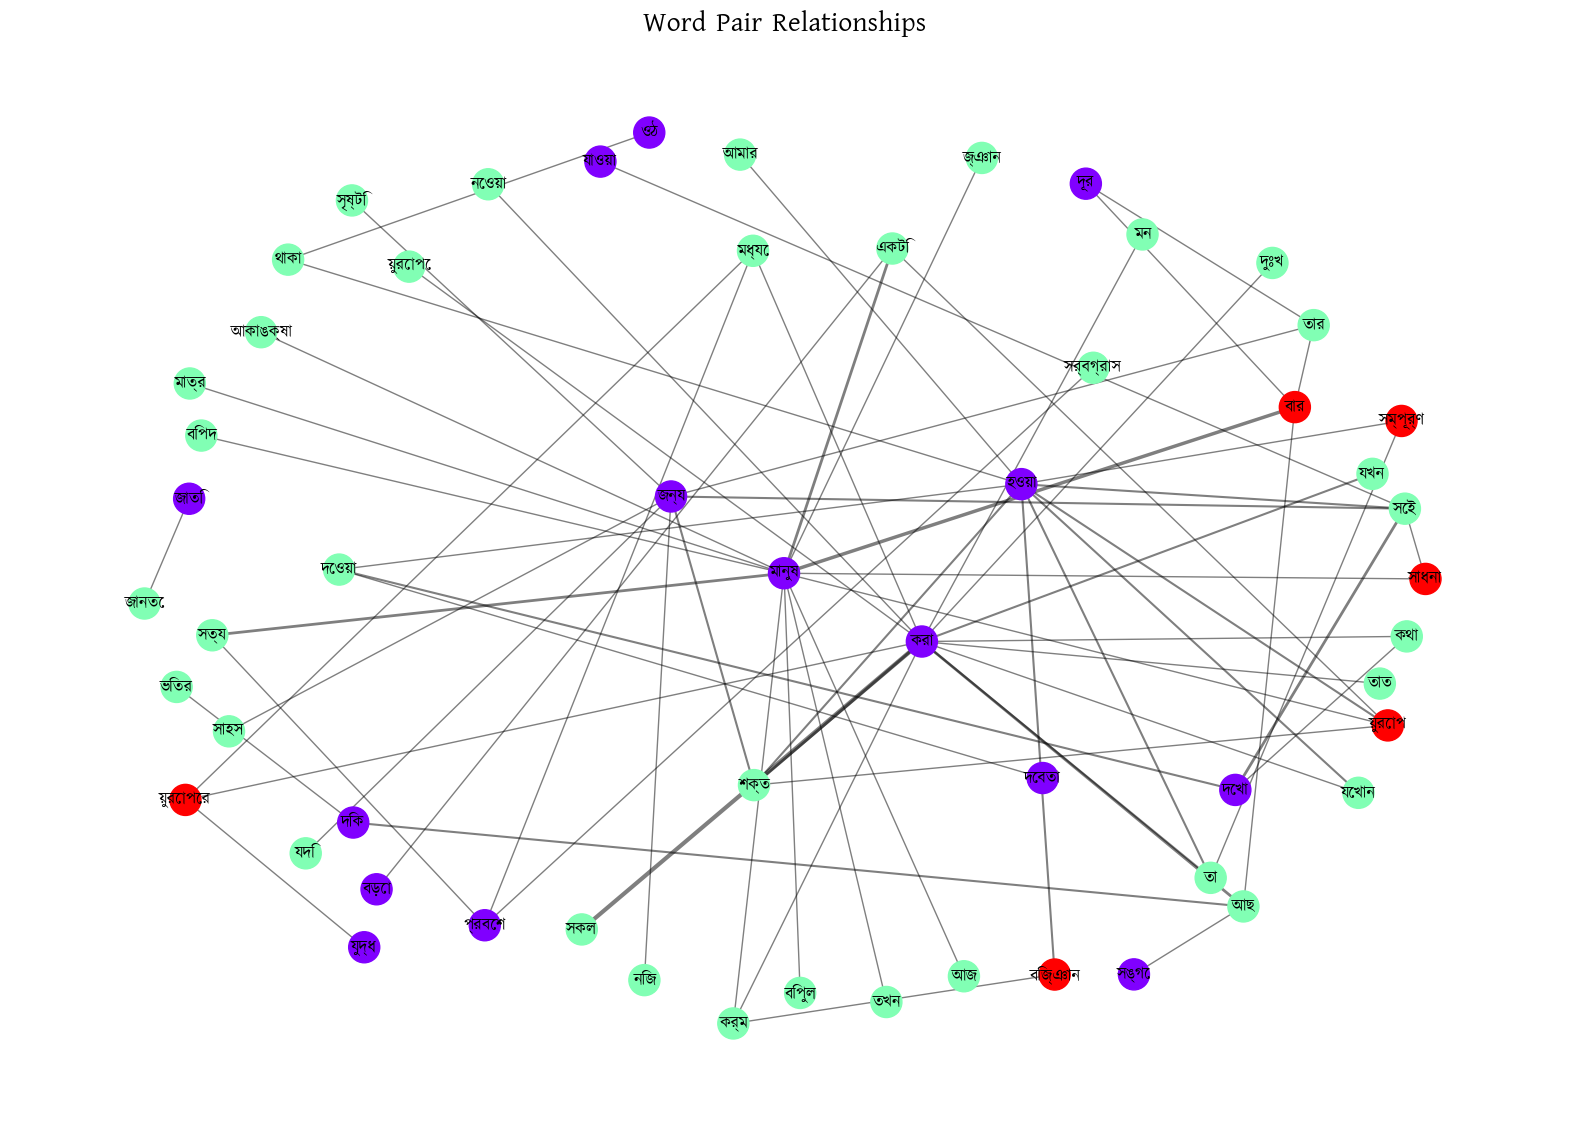

In [68]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity
import logging
from pathlib import Path
import matplotlib.font_manager as fm
from gensim.models import Word2Vec

# Logging setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Function to set up custom font for Bangla
def custom_font(font_path):
    try:
        font_path = Path(font_path)
        if not font_path.exists():
            logger.error(f"Font file not found: {font_path}")
            return None

        # Load and register the font
        font_prop = fm.FontProperties(fname=str(font_path))
        font_name = font_prop.get_name()
        fm.fontManager.addfont(str(font_path))

        plt.rcParams['font.family'] = font_name
        logger.info(f"Font loaded successfully: {font_name}")
        return font_name
    except Exception as e:
        logger.error(f"Error loading font: {e}")
        return None

# Function to check frequency of word pairs
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)
    for sentence in cleaned_sentences:
        words = sentence.split()
        unique_words = set(words)  # Get unique words in the sentence
        word_pairs = combinations(unique_words, 2)
        for pair in word_pairs:
            pair_frequency[pair] += 1
    return pair_frequency

# Function to create graph from word pairs with frequency > 1 and cosine similarity > 0.1
def plot_nodes(pair_frequency, word_embeddings, font_path, similarity_threshold=0.1):
    # Load custom Bangla font
    font_name = custom_font(font_path)
    if not font_name:
        logger.warning("Could not load font. Falling back to default font.")

    G = nx.Graph()

    # Add edges only for word pairs that have cosine similarity > 0.1 and frequency > 1
    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            node1, node2 = pair
            if node1 in word_embeddings and node2 in word_embeddings:
                # Calculate cosine similarity
                vec1 = word_embeddings[node1].reshape(1, -1)
                vec2 = word_embeddings[node2].reshape(1, -1)
                similarity = cosine_similarity(vec1, vec2)[0][0]

                if similarity > similarity_threshold:
                    G.add_edge(node1, node2, weight=frequency, similarity=similarity)

    # Print the total number of nodes
    total_nodes = len(G.nodes)
    print(f"Total number of nodes: {total_nodes}")  # Print total number of nodes

    # Calculate the chromatic number using greedy coloring (node coloring)
    color_map = nx.coloring.greedy_color(G, strategy='largest_first')
    chromatic_number = max(color_map.values()) + 1  # Chromatic number is the max color index + 1
    print(f"Chromatic number: {chromatic_number}")

    # Greedy Edge Coloring (Fallback)
    edge_colors = greedy_edge_coloring(G)
    chromatic_index = len(set(edge_colors.values()))  # The chromatic index is the number of colors used
    # print(f"Chromatic index (greedy): {chromatic_index}")
    print(f"Chromatic index: {chromatic_index}")

    # Positioning of nodes using spring layout
    pos = nx.spring_layout(G, k=2)
    weights = nx.get_edge_attributes(G, 'weight').values()

    # Draw the graph
    plt.figure(figsize=(20, 14))

    # Draw network nodes with colors based on their assigned color
    node_colors = [color_map[node] for node in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_colors, cmap=plt.cm.rainbow)

    # Draw edges with widths proportional to their weight
    nx.draw_networkx_edges(G, pos, width=[w / 2 for w in weights], alpha=0.5)

    # Draw labels with Bangla font
    nx.draw_networkx_labels(G, pos, font_size=12, font_family=plt.rcParams['font.family'])

    plt.title('Word Pair Relationships', fontdict={'fontsize': 20, 'fontweight': 'bold'}, fontfamily=plt.rcParams['font.family'])
    plt.axis('off')
    plt.show()

# Greedy algorithm for edge coloring
def greedy_edge_coloring(G):
    """
    Assigns colors to edges using a greedy algorithm.
    Returns a dictionary of edge: color assignments.
    """
    edge_colors = {}
    color = 0

    # Sort edges by the largest degree node
    edges = sorted(G.edges(), key=lambda e: max(G.degree(e[0]), G.degree(e[1])), reverse=True)

    for edge in edges:
        neighbor_colors = set()
        for neighbor in G[edge[0]]:
            if (edge[0], neighbor) in edge_colors:
                neighbor_colors.add(edge_colors[(edge[0], neighbor)])
        for neighbor in G[edge[1]]:
            if (edge[1], neighbor) in edge_colors:
                neighbor_colors.add(edge_colors[(edge[1], neighbor)])

        # Find the first available color that is not used by neighbors
        while color in neighbor_colors:
            color += 1
        edge_colors[edge] = color
        color += 1  # Increment color for next edge

    return edge_colors

# Function to get Word2Vec embeddings for the words in the graph
def get_word2vec_embeddings(cleaned_sentences, graph_nodes, vector_size=100, window=5, min_count=1):
    # Split the cleaned sentences into lists of words
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]

    # Train the Word2Vec model
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)

    # Get the word vectors for the graph nodes (words involved in pairs)
    word_vectors = model.wv
    vectors = {word: word_vectors[word] for word in graph_nodes if word in word_vectors}

    return vectors

# Path to the Kalpurush font (replace with your font path)
font_path = 'kalpurush.ttf'


# Generate pair frequency
pair_frequency = check_pair_frequency(cleaned_sentences)

# Create graph from word pairs with frequency > 1
# Extract the nodes (unique words) from the pair frequency
graph_nodes = list(set([node for pair in pair_frequency for node in pair]))

# Get Word2Vec embeddings for the graph nodes (words involved in word pairs with frequency > 1)
word2vec_embeddings = get_word2vec_embeddings(cleaned_sentences, graph_nodes)

# Plot nodes with Bangla labels for word pairs with cosine similarity > 0.1
plot_nodes(pair_frequency, word2vec_embeddings, font_path, similarity_threshold=0.1)


# DEGENARACY

### In graph theory, a k-degenerate graph is an undirected graph in which every subgraph has at least one vertex of degree at most k: that is, some vertex in the subgraph touches k or fewer of the subgraph's edges. The degeneracy of a graph is the smallest value of k for which it is k-degenerate. The degeneracy of a graph is a measure of how sparse it is, and is within a constant factor of other sparsity measures such as the arboricity of a graph.

Total number of nodes: 56
Graph Degeneracy: 2


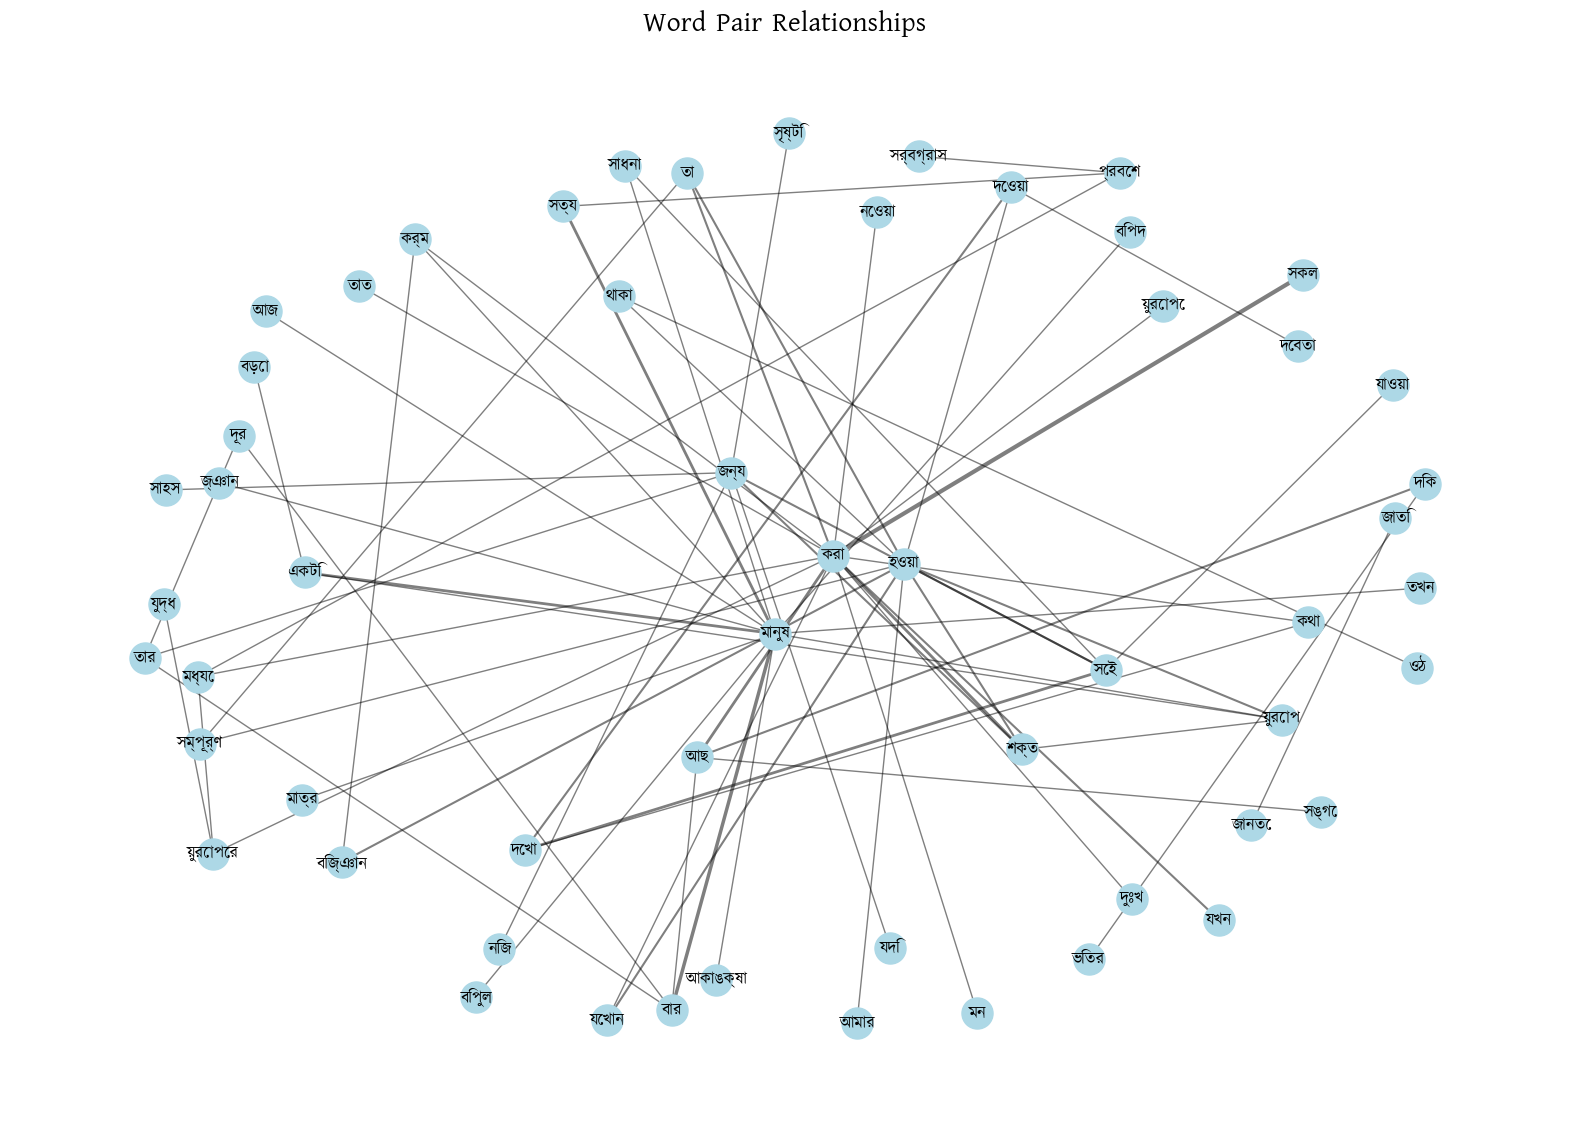

In [69]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity
import logging
from pathlib import Path
import matplotlib.font_manager as fm
from gensim.models import Word2Vec

# Logging setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Function to set up custom font for Bangla
def custom_font(font_path):
    try:
        font_path = Path(font_path)
        if not font_path.exists():
            logger.error(f"Font file not found: {font_path}")
            return None

        # Load and register the font
        font_prop = fm.FontProperties(fname=str(font_path))
        font_name = font_prop.get_name()
        fm.fontManager.addfont(str(font_path))

        plt.rcParams['font.family'] = font_name
        logger.info(f"Font loaded successfully: {font_name}")
        return font_name
    except Exception as e:
        logger.error(f"Error loading font: {e}")
        return None

# Function to check frequency of word pairs
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)
    for sentence in cleaned_sentences:
        words = sentence.split()
        unique_words = set(words)  # Get unique words in the sentence
        word_pairs = combinations(unique_words, 2)
        for pair in word_pairs:
            pair_frequency[pair] += 1
    return pair_frequency

# Function to calculate degeneracy of the graph
def calculate_degeneracy(G):
    """
    Calculate the degeneracy of a graph.
    Degeneracy is the smallest k such that the graph has a k-degenerate ordering.
    """
    # Create a copy of the graph to avoid modifying the original
    graph = G.copy()

    # Track the maximum degree encountered during node removal
    degeneracy = 0
    core_numbers = {}

    # Iteratively remove nodes with minimum degree
    while graph.number_of_nodes() > 0:
        # Find the node with the minimum degree
        degree_dict = dict(graph.degree())
        if not degree_dict:
            break

        min_degree = min(degree_dict.values())
        min_degree_nodes = [n for n, d in degree_dict.items() if d == min_degree]

        # If multiple nodes have the same minimum degree, choose one
        min_degree_node = min_degree_nodes[0]

        # Update degeneracy with the current node's degree
        core_numbers[min_degree_node] = min_degree
        degeneracy = max(degeneracy, graph.degree(min_degree_node))

        # Remove the node with minimum degree
        graph.remove_node(min_degree_node)

    return degeneracy

# Function to create graph from word pairs with frequency > 1 and cosine similarity > 0.1
def plot_nodes(pair_frequency, word_embeddings, font_path, similarity_threshold=0.1):
    # Load custom Bangla font
    font_name = custom_font(font_path)
    if not font_name:
        logger.warning("Could not load font. Falling back to default font.")

    G = nx.Graph()

    # Add edges only for word pairs that have cosine similarity > 0.1 and frequency > 1
    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            node1, node2 = pair
            if node1 in word_embeddings and node2 in word_embeddings:
                # Calculate cosine similarity
                vec1 = word_embeddings[node1].reshape(1, -1)
                vec2 = word_embeddings[node2].reshape(1, -1)
                similarity = cosine_similarity(vec1, vec2)[0][0]

                if similarity > similarity_threshold:
                    G.add_edge(node1, node2, weight=frequency, similarity=similarity)

    # Print the total number of nodes
    total_nodes = len(G.nodes)
    print(f"Total number of nodes: {total_nodes}")  # Print total number of nodes

    # Calculate and print graph degeneracy
    degeneracy = calculate_degeneracy(G)
    print(f"Graph Degeneracy: {degeneracy}")

    # Positioning of nodes using spring layout
    pos = nx.spring_layout(G, k=2)
    weights = nx.get_edge_attributes(G, 'weight').values()

    plt.figure(figsize=(20, 14))

    # Draw network nodes with light blue color
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')

    # Draw edges with widths proportional to their weight
    nx.draw_networkx_edges(G, pos, width=[w / 2 for w in weights], alpha=0.5)

    # Draw node labels using the custom Bangla font
    nx.draw_networkx_labels(G, pos, font_size=12, font_family=plt.rcParams['font.family'])

    # Set title and axis
    plt.title('Word Pair Relationships', fontdict={'fontsize': 20, 'fontweight': 'bold'}, fontfamily=plt.rcParams['font.family'])
    plt.axis('off')

    # Show the plot
    plt.show()

# Function to get Word2Vec embeddings for the words in the graph
def get_word2vec_embeddings(cleaned_sentences, graph_nodes, vector_size=100, window=5, min_count=1):
    # Split the cleaned sentences into lists of words
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]

    # Train the Word2Vec model
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)

    # Get the word vectors for the graph nodes (words involved in pairs)
    word_vectors = model.wv
    vectors = {word: word_vectors[word] for word in graph_nodes if word in word_vectors}

    return vectors

# Path to the Kalpurush font
font_path = 'kalpurush.ttf'


# Generate pair frequency
pair_frequency = check_pair_frequency(cleaned_sentences)

# Create graph from word pairs with frequency > 1
# Extract the nodes (unique words) from the pair frequency
graph_nodes = list(set([node for pair in pair_frequency for node in pair]))

# Get Word2Vec embeddings for the graph nodes (words involved in word pairs with frequency > 1)
word2vec_embeddings = get_word2vec_embeddings(cleaned_sentences, graph_nodes)

# Plot nodes with Bangla labels for word pairs with cosine similarity > 0.1
plot_nodes(pair_frequency, word2vec_embeddings, font_path, similarity_threshold=0.1)


# DENSITY

### To calculate the density of a graph, you can use the formula:

Density
=
2
×
Number of edges
Number of nodes
×
(
Number of nodes
−
1
)
Density=
Number of nodes×(Number of nodes−1)
2×Number of edges
​


Total number of nodes: 56
Graph Density: 0.0455


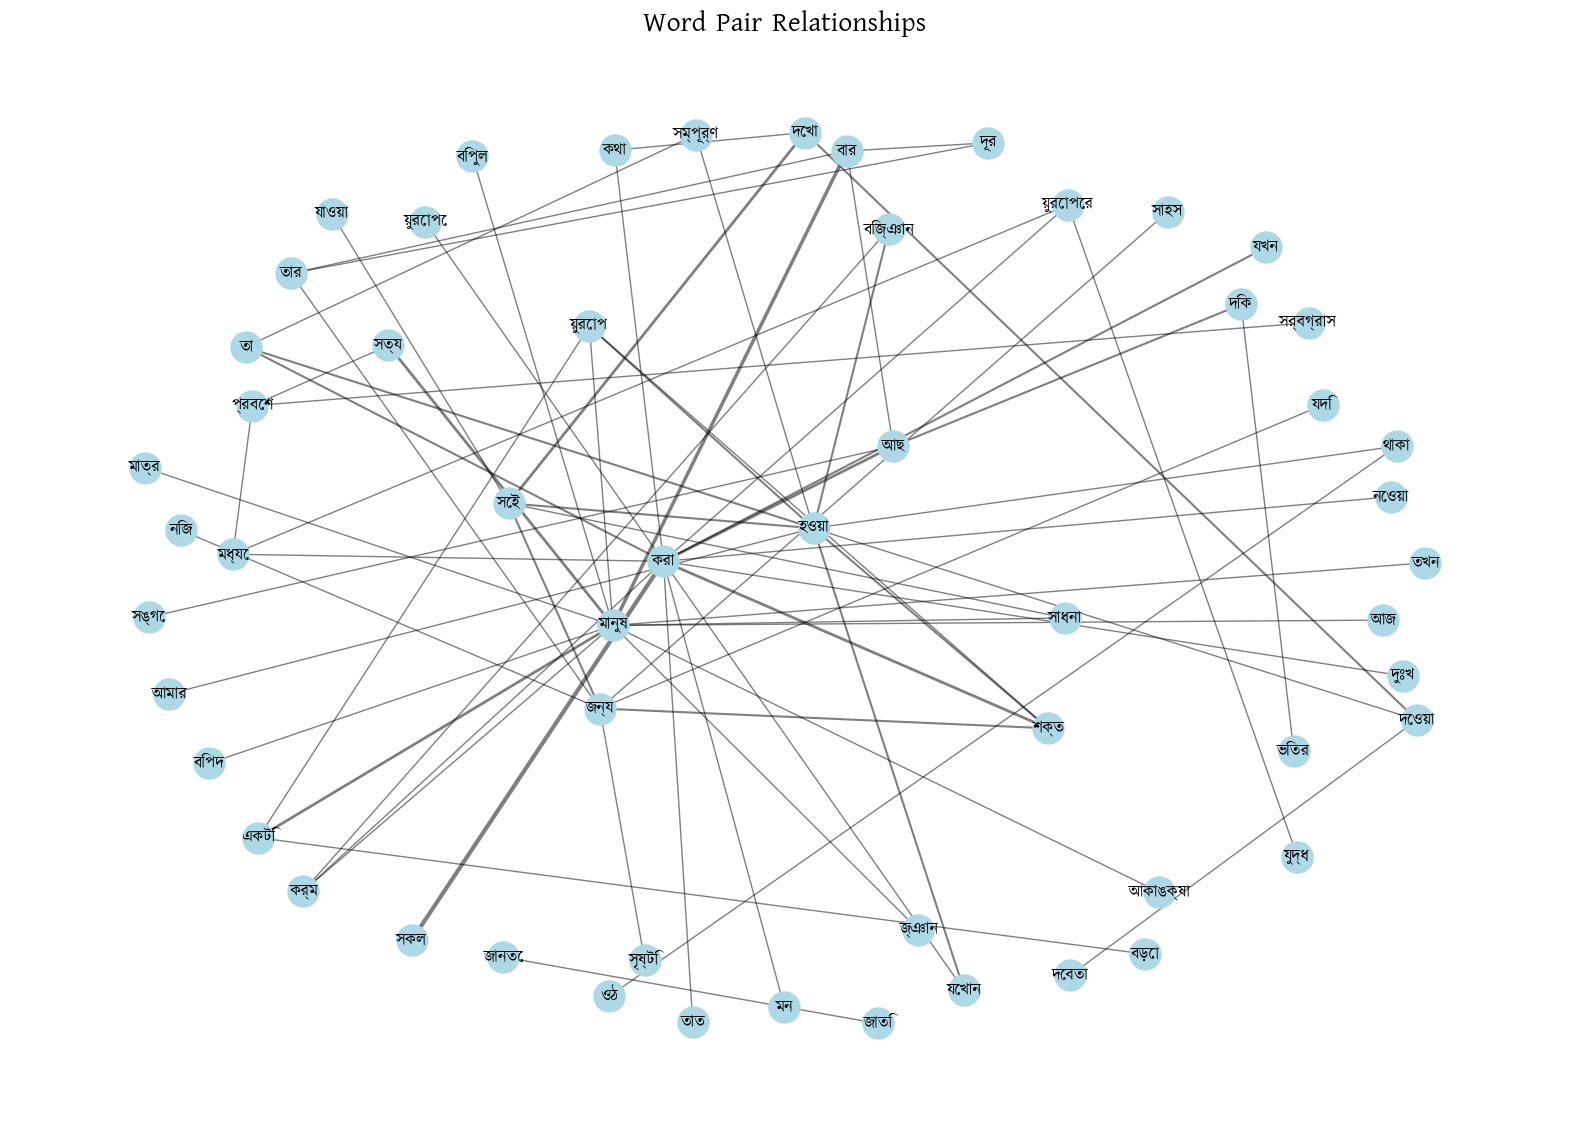

In [70]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity
import logging
from pathlib import Path
import matplotlib.font_manager as fm
from gensim.models import Word2Vec

# Logging setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Function to set up custom font for Bangla
def custom_font(font_path):
    try:
        font_path = Path(font_path)
        if not font_path.exists():
            logger.error(f"Font file not found: {font_path}")
            return None

        # Load and register the font
        font_prop = fm.FontProperties(fname=str(font_path))
        font_name = font_prop.get_name()
        fm.fontManager.addfont(str(font_path))

        plt.rcParams['font.family'] = font_name
        logger.info(f"Font loaded successfully: {font_name}")
        return font_name
    except Exception as e:
        logger.error(f"Error loading font: {e}")
        return None

# Function to check frequency of word pairs
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)
    for sentence in cleaned_sentences:
        words = sentence.split()
        unique_words = set(words)  # Get unique words in the sentence
        word_pairs = combinations(unique_words, 2)
        for pair in word_pairs:
            pair_frequency[pair] += 1
    return pair_frequency

# Function to calculate graph density
def calculate_graph_density(G):
    """
    Calculate the density of a graph.
    The density is defined as the ratio of the number of edges to the number of possible edges.
    """
    # Get the number of nodes and edges in the graph
    num_nodes = len(G.nodes)
    num_edges = G.number_of_edges()

    # Calculate the maximum possible edges in an undirected graph
    max_possible_edges = num_nodes * (num_nodes - 1) / 2

    # Calculate and return the density
    if max_possible_edges == 0:  # Avoid division by zero if the graph has no nodes
        return 0.0
    return num_edges / max_possible_edges

# Function to create graph from word pairs with frequency > 1 and cosine similarity > 0.1
def plot_nodes(pair_frequency, word_embeddings, font_path, similarity_threshold=0.1):
    # Load custom Bangla font
    font_name = custom_font(font_path)
    if not font_name:
        logger.warning("Could not load font. Falling back to default font.")

    G = nx.Graph()

    # Add edges only for word pairs that have cosine similarity > 0.1 and frequency > 1
    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            node1, node2 = pair
            if node1 in word_embeddings and node2 in word_embeddings:
                # Calculate cosine similarity
                vec1 = word_embeddings[node1].reshape(1, -1)
                vec2 = word_embeddings[node2].reshape(1, -1)
                similarity = cosine_similarity(vec1, vec2)[0][0]

                if similarity > similarity_threshold:
                    G.add_edge(node1, node2, weight=frequency, similarity=similarity)

    # Print the total number of nodes
    total_nodes = len(G.nodes)
    print(f"Total number of nodes: {total_nodes}")  # Print total number of nodes

    # Calculate and print the graph density
    graph_density = calculate_graph_density(G)
    print(f"Graph Density: {graph_density:.4f}")

    # Positioning of nodes using spring layout
    pos = nx.spring_layout(G, k=2)
    weights = nx.get_edge_attributes(G, 'weight').values()

    plt.figure(figsize=(20, 14))

    # Draw network nodes with light blue color
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')

    # Draw edges with widths proportional to their weight
    nx.draw_networkx_edges(G, pos, width=[w / 2 for w in weights], alpha=0.5)

    # Draw node labels using the custom Bangla font
    nx.draw_networkx_labels(G, pos, font_size=12, font_family=plt.rcParams['font.family'])

    # Set title and axis
    plt.title('Word Pair Relationships', fontdict={'fontsize': 20, 'fontweight': 'bold'}, fontfamily=plt.rcParams['font.family'])
    plt.axis('off')

    # Show the plot
    plt.show()

# Function to get Word2Vec embeddings for the words in the graph
def get_word2vec_embeddings(cleaned_sentences, graph_nodes, vector_size=100, window=5, min_count=1):
    # Split the cleaned sentences into lists of words
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]

    # Train the Word2Vec model
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)

    # Get the word vectors for the graph nodes (words involved in pairs)
    word_vectors = model.wv
    vectors = {word: word_vectors[word] for word in graph_nodes if word in word_vectors}

    return vectors

# Path to the Kalpurush font
font_path = 'kalpurush.ttf'


# Generate pair frequency
pair_frequency = check_pair_frequency(cleaned_sentences)

# Create graph from word pairs with frequency > 1
# Extract the nodes (unique words) from the pair frequency
graph_nodes = list(set([node for pair in pair_frequency for node in pair]))

# Get Word2Vec embeddings for the graph nodes (words involved in word pairs with frequency > 1)
word2vec_embeddings = get_word2vec_embeddings(cleaned_sentences, graph_nodes)

# Plot nodes with Bangla labels for word pairs with cosine similarity > 0.1
plot_nodes(pair_frequency, word2vec_embeddings, font_path, similarity_threshold=0.1)


# EDGE CUT, VERTEX CUT, EDGE CONNECTIVITY, VERTEX CONNECTIVITY, MATCHING, PERFECT MSATCHING

Total number of nodes: 56


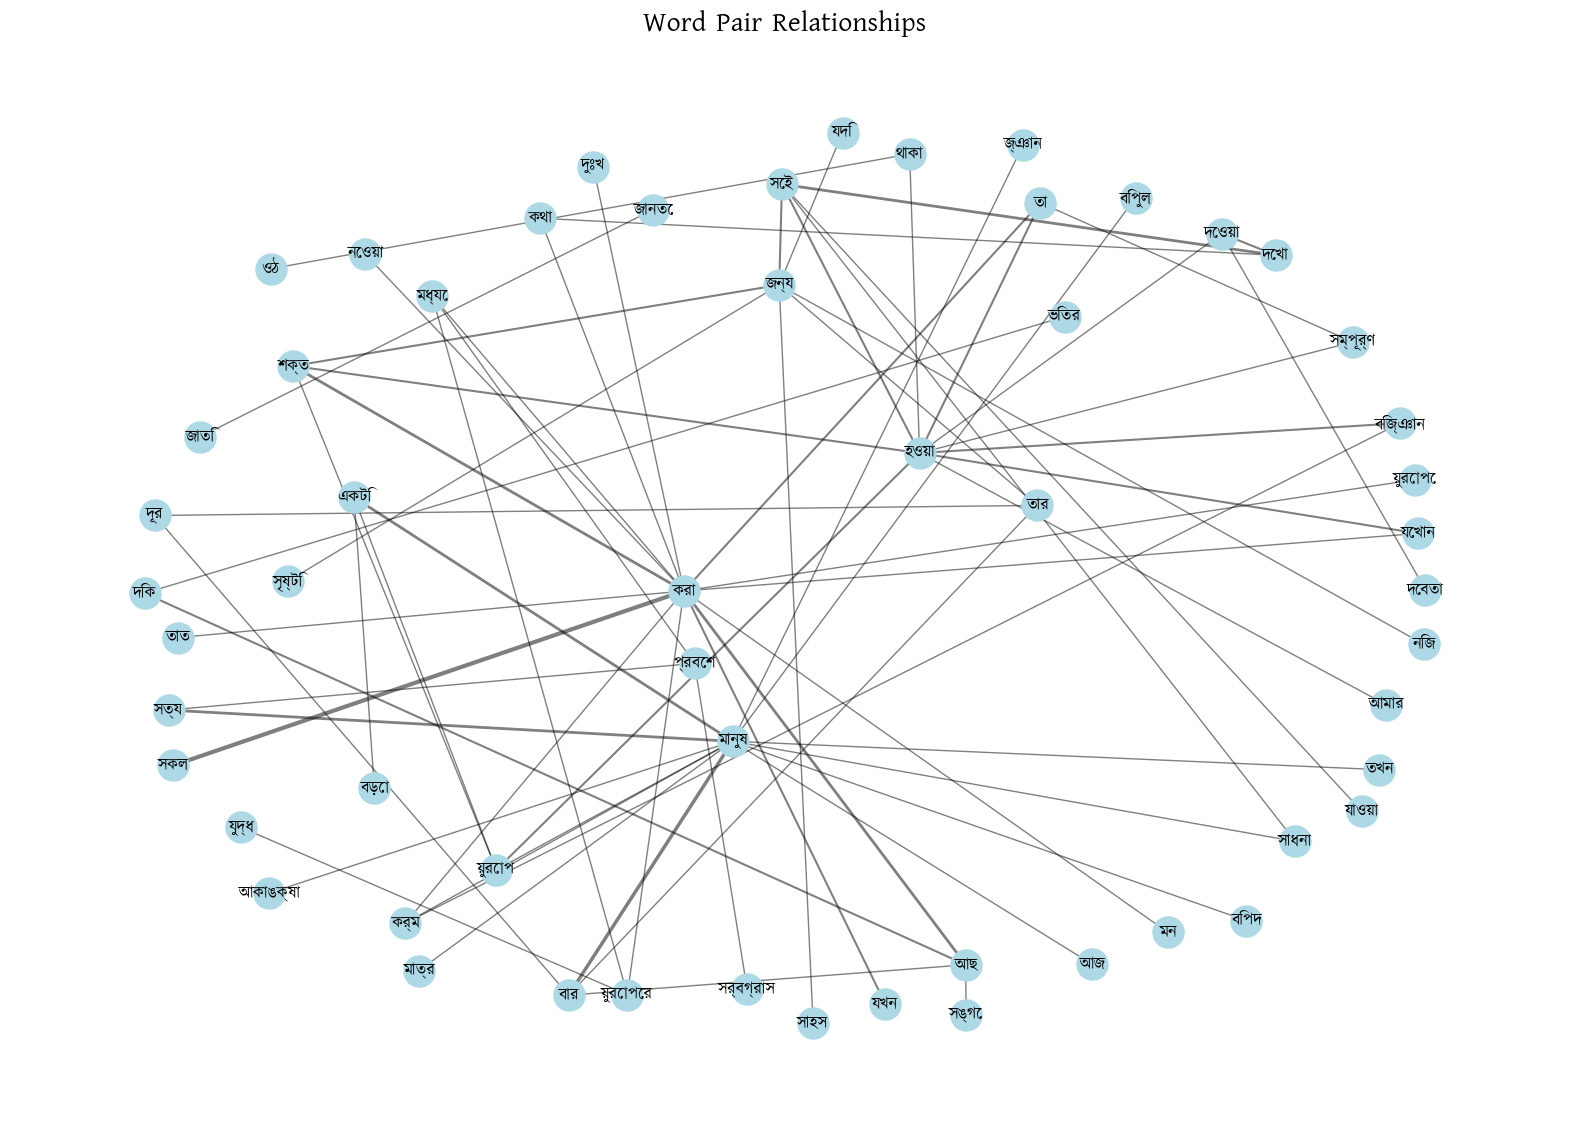

Edge Cut: [('করা', 'যখন'), ('করা', 'নেওয়া'), ('করা', 'কথা'), ('করা', 'তাত'), ('করা', 'সকল'), ('করা', 'তা'), ('করা', 'আছ'), ('করা', 'দুঃখ'), ('করা', 'মন'), ('করা', 'শক্ত'), ('করা', 'কর্ম'), ('করা', 'মধ্যে'), ('করা', 'য়ুরোপে'), ('করা', 'যেখান'), ('করা', 'য়ুরোপের'), ('তার', 'দূর'), ('তার', 'বার'), ('তার', 'জন্য'), ('দূর', 'বার'), ('দেওয়া', 'হওয়া'), ('দেওয়া', 'দেখা'), ('দেওয়া', 'দেবতা'), ('হওয়া', 'থাকা'), ('হওয়া', 'শক্ত'), ('হওয়া', 'বিজ্ঞান'), ('হওয়া', 'আমার'), ('হওয়া', 'য়ুরোপ'), ('হওয়া', 'সেই'), ('হওয়া', 'তা'), ('হওয়া', 'সম্পূর্ণ'), ('হওয়া', 'যেখান'), ('সেই', 'সাধনা'), ('সেই', 'যাওয়া'), ('সেই', 'জন্য'), ('সেই', 'দেখা'), ('সাধনা', 'মানুষ'), ('কথা', 'দেখা'), ('জন্য', 'সাহস'), ('জন্য', 'শক্ত'), ('জন্য', 'যদি'), ('জন্য', 'সৃষ্টি'), ('জন্য', 'নিজ'), ('মাত্র', 'মানুষ'), ('মানুষ', 'একটি'), ('মানুষ', 'বার'), ('মানুষ', 'কর্ম'), ('মানুষ', 'জ্ঞান'), ('মানুষ', 'বিপুল'), ('মানুষ', 'য়ুরোপ'), ('মানুষ', 'সত্য'), ('মানুষ', 'আজ'), ('মানুষ', 'বিপদ'), ('মানুষ', 'আকাঙক্ষা'), ('মানুষ', 'তখন'), ('একটি', 'য়ুরোপ'

In [71]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity
import logging
from pathlib import Path
import matplotlib.font_manager as fm
from gensim.models import Word2Vec

# Logging setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Function to set up custom font for Bangla
def custom_font(font_path):
    try:
        font_path = Path(font_path)
        if not font_path.exists():
            logger.error(f"Font file not found: {font_path}")
            return None

        # Load and register the font
        font_prop = fm.FontProperties(fname=str(font_path))
        font_name = font_prop.get_name()
        fm.fontManager.addfont(str(font_path))

        plt.rcParams['font.family'] = font_name
        logger.info(f"Font loaded successfully: {font_name}")
        return font_name
    except Exception as e:
        logger.error(f"Error loading font: {e}")
        return None

# Function to check frequency of word pairs
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)
    for sentence in cleaned_sentences:
        words = sentence.split()
        unique_words = set(words)  # Get unique words in the sentence
        word_pairs = combinations(unique_words, 2)
        for pair in word_pairs:
            pair_frequency[pair] += 1
    return pair_frequency

# Function to create graph from word pairs with frequency > 1 and cosine similarity > 0.1
def create_graph(pair_frequency, word_embeddings, similarity_threshold=0.1):
    G = nx.Graph()

    # Add edges only for word pairs that have cosine similarity > 0.1 and frequency > 1
    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            node1, node2 = pair
            if node1 in word_embeddings and node2 in word_embeddings:
                # Calculate cosine similarity
                vec1 = word_embeddings[node1].reshape(1, -1)
                vec2 = word_embeddings[node2].reshape(1, -1)
                similarity = cosine_similarity(vec1, vec2)[0][0]

                if similarity > similarity_threshold:
                    G.add_edge(node1, node2, weight=frequency, similarity=similarity)

    return G

# Function to get Word2Vec embeddings for the words in the graph
def get_word2vec_embeddings(cleaned_sentences, graph_nodes, vector_size=100, window=5, min_count=1):
    # Split the cleaned sentences into lists of words
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]

    # Train the Word2Vec model
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)

    # Get the word vectors for the graph nodes (words involved in pairs)
    word_vectors = model.wv
    vectors = {word: word_vectors[word] for word in graph_nodes if word in word_vectors}

    return vectors

# Graph analysis functions
def edge_cut(G):
    # Placeholder for edge cut logic, modify as necessary
    return list(G.edges())

def vertex_cut(G):
    # Placeholder for vertex cut logic, modify as necessary
    return list(G.nodes())

def edge_cover(G):
    # Placeholder for edge cover logic, modify as necessary
    return list(G.edges())

def vertex_cover(G):
    # Placeholder for vertex cover logic, modify as necessary
    return list(G.nodes())

def matching(G):
    return list(nx.max_weight_matching(G))

def perfect_matching(G):
    if nx.is_bipartite(G):
        matching_set = nx.max_weight_matching(G)
        if len(matching_set) == len(G.nodes) // 2:
            return "Perfect matching found"
        else:
            return "Perfect matching not possible"
    else:
        return "Graph is not bipartite, cannot have a perfect matching"

# Function to plot nodes with word embeddings and Bangla labels
def plot_nodes(pair_frequency, word_embeddings, font_path, similarity_threshold=0.1):
    font_name = custom_font(font_path)
    if not font_name:
        logger.warning("Could not load font. Falling back to default font.")

    G = create_graph(pair_frequency, word_embeddings, similarity_threshold)

    # Print the total number of nodes
    total_nodes = len(G.nodes)
    print(f"Total number of nodes: {total_nodes}")  # Print total number of nodes

    # Positioning of nodes using spring layout
    pos = nx.spring_layout(G, k=2)
    weights = nx.get_edge_attributes(G, 'weight').values()

    plt.figure(figsize=(20, 14))

    # Draw network nodes with light blue color
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')

    # Draw edges with widths proportional to their weight
    nx.draw_networkx_edges(G, pos, width=[w / 2 for w in weights], alpha=0.5)

    # Draw node labels using the custom Bangla font
    nx.draw_networkx_labels(G, pos, font_size=12, font_family=plt.rcParams['font.family'])

    # Set title and axis
    plt.title('Word Pair Relationships', fontdict={'fontsize': 20, 'fontweight': 'bold'}, fontfamily=plt.rcParams['font.family'])
    plt.axis('off')

    # Show the plot
    plt.show()


# Path to the Kalpurush font
font_path = 'kalpurush.ttf'

# Generate pair frequency (Assuming cleaned_sentences is already defined)
pair_frequency = check_pair_frequency(cleaned_sentences)

# Extract the nodes (unique words) from the pair frequency
graph_nodes = list(set([node for pair in pair_frequency for node in pair]))

# Get Word2Vec embeddings for the graph nodes (words involved in word pairs with frequency > 1)
word2vec_embeddings = get_word2vec_embeddings(cleaned_sentences, graph_nodes)

# Plot nodes with Bangla labels for word pairs with cosine similarity > 0.1
plot_nodes(pair_frequency, word2vec_embeddings, font_path, similarity_threshold=0.1)

# Create graph from word pairs with frequency > 1
G = create_graph(pair_frequency, word2vec_embeddings)

# Print graph properties
print(f"Edge Cut: {edge_cut(G)}")
print(f"Vertex Cut: {vertex_cut(G)}")
print(f"Edge Cover: {edge_cover(G)}")
print(f"Vertex Cover: {vertex_cover(G)}")
print(f"Matching: {matching(G)}")
print(f"Perfect Matching: {perfect_matching(G)}")

# Printing total numbers for each
print(f"Total number of edges in Edge Cut: {len(edge_cut(G))}")
print(f"Total number of nodes in Vertex Cut: {len(vertex_cut(G))}")
print(f"Total number of edges in Edge Cover: {len(edge_cover(G))}")
print(f"Total number of nodes in Vertex Cover: {len(vertex_cover(G))}")
print(f"Total number of matches in Matching: {len(matching(G))}")
print(f"Perfect Matching Status: {perfect_matching(G)}")


# GLOBAL CLUSTERING CO-EFFICIENT, H-INDEX

### Global Clustering Coefficient and H-index for your graph, we can define two additional functions:

Global Clustering Coefficient: The global clustering coefficient measures the degree to which nodes in a graph tend to cluster together. It can be computed using the formula:
𝐶
=
3
×
Number of triangles in the graph
Number of connected triples of nodes
C=
Number of connected triples of nodes
3×Number of triangles in the graph
​

NetworkX has a built-in method to compute the global clustering coefficient.

H-index: The H-index is a measure of the productivity and citation impact of the publications of a researcher or scholar. In the context of graph theory, the H-index can be computed as the maximum integer
ℎ
h such that a node has at least
ℎ
h neighbors with degree at least
ℎ
h. It’s useful for networks where you want to measure a node’s influence based on its connections.

Total number of nodes: 56


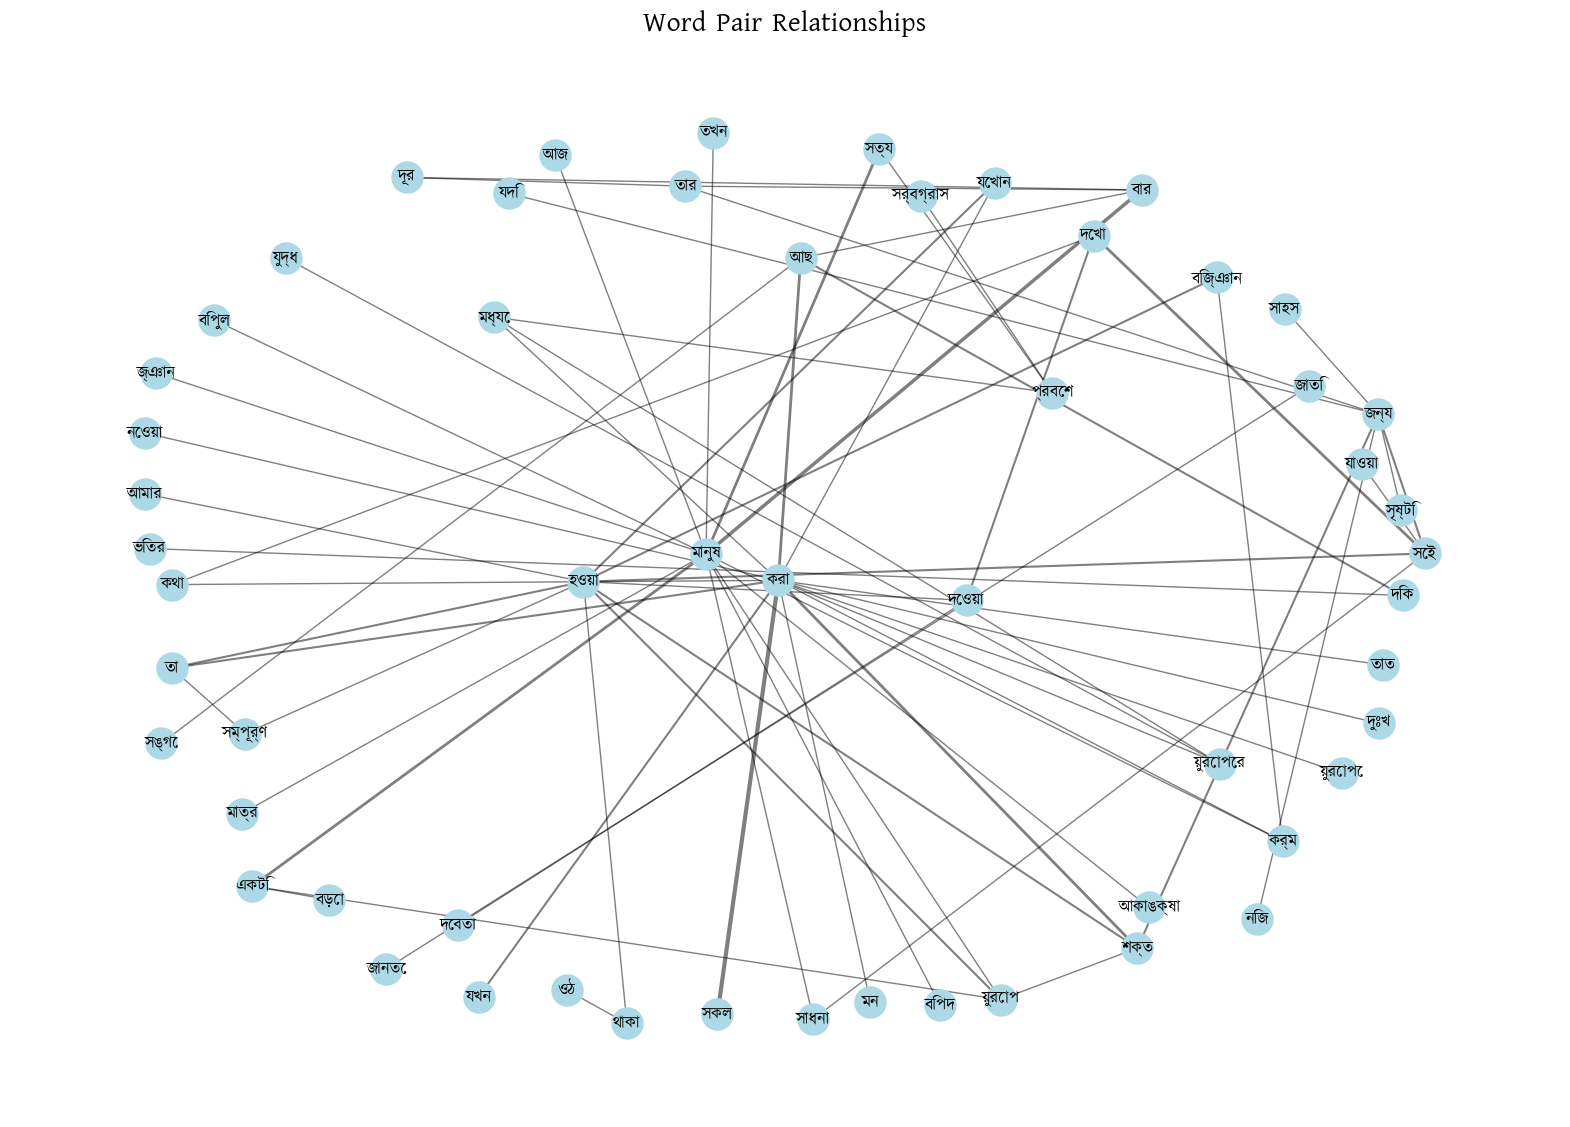

Global Clustering Coefficient: 0.07857360893075178
H-index of the graph: 5


In [72]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity
import logging
from pathlib import Path
import matplotlib.font_manager as fm
from gensim.models import Word2Vec

# Logging setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Function to set up custom font for Bangla
def custom_font(font_path):
    try:
        font_path = Path(font_path)
        if not font_path.exists():
            logger.error(f"Font file not found: {font_path}")
            return None

        font_prop = fm.FontProperties(fname=str(font_path))
        font_name = font_prop.get_name()
        fm.fontManager.addfont(str(font_path))

        plt.rcParams['font.family'] = font_name
        logger.info(f"Font loaded successfully: {font_name}")
        return font_name
    except Exception as e:
        logger.error(f"Error loading font: {e}")
        return None

# Function to check frequency of word pairs
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)
    for sentence in cleaned_sentences:
        words = sentence.split()
        unique_words = set(words)
        word_pairs = combinations(unique_words, 2)
        for pair in word_pairs:
            pair_frequency[pair] += 1
    return pair_frequency

# Function to create graph from word pairs with frequency > 1 and cosine similarity > 0.1
def create_graph(pair_frequency, word_embeddings, similarity_threshold=0.1):
    G = nx.Graph()

    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            node1, node2 = pair
            if node1 in word_embeddings and node2 in word_embeddings:
                vec1 = word_embeddings[node1].reshape(1, -1)
                vec2 = word_embeddings[node2].reshape(1, -1)
                similarity = cosine_similarity(vec1, vec2)[0][0]
                if similarity > similarity_threshold:
                    G.add_edge(node1, node2, weight=frequency, similarity=similarity)

    return G

# Function to get Word2Vec embeddings for the words in the graph
def get_word2vec_embeddings(cleaned_sentences, graph_nodes, vector_size=100, window=5, min_count=1):
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)
    word_vectors = model.wv
    vectors = {word: word_vectors[word] for word in graph_nodes if word in word_vectors}
    return vectors

# Graph analysis functions
def global_clustering_coefficient(G):
    if G.number_of_nodes() > 0:
        return nx.average_clustering(G)
    return 0

def h_index(G):
    if G.number_of_nodes() > 0:
        degrees = sorted([deg for _, deg in G.degree()], reverse=True)
        h = 0
        for i, degree in enumerate(degrees):
            if degree >= i + 1:
                h = i + 1
            else:
                break
        return h
    return 0

# Function to plot nodes with word embeddings and Bangla labels
def plot_nodes(pair_frequency, word_embeddings, font_path, similarity_threshold=0.1):
    font_name = custom_font(font_path)
    if not font_name:
        logger.warning("Could not load font. Falling back to default font.")

    G = create_graph(pair_frequency, word_embeddings, similarity_threshold)

    # Check if the graph is empty
    if G.number_of_nodes() == 0:
        logger.warning("The graph is empty, skipping plot.")
        return

    total_nodes = len(G.nodes)
    print(f"Total number of nodes: {total_nodes}")

    # Positioning of nodes using spring layout
    pos = nx.spring_layout(G, k=2)
    weights = nx.get_edge_attributes(G, 'weight').values()

    plt.figure(figsize=(20, 14))

    # Draw network nodes with light blue color
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')

    # Draw edges with widths proportional to their weight
    nx.draw_networkx_edges(G, pos, width=[w / 2 for w in weights], alpha=0.5)

    # Draw node labels using the custom Bangla font
    nx.draw_networkx_labels(G, pos, font_size=12, font_family=plt.rcParams['font.family'])

    # Set title and axis
    plt.title('Word Pair Relationships', fontdict={'fontsize': 20, 'fontweight': 'bold'}, fontfamily=plt.rcParams['font.family'])
    plt.axis('off')

    # Show the plot
    plt.show()


# Path to the Kalpurush font (replace with your font path)
font_path = 'kalpurush.ttf'

# Generate pair frequency (Assuming cleaned_sentences is already defined)
pair_frequency = check_pair_frequency(cleaned_sentences)

# Extract the nodes (unique words) from the pair frequency
graph_nodes = list(set([node for pair in pair_frequency for node in pair]))

# Get Word2Vec embeddings for the graph nodes (words involved in word pairs with frequency > 1)
word2vec_embeddings = get_word2vec_embeddings(cleaned_sentences, graph_nodes)

# Plot nodes with Bangla labels for word pairs with cosine similarity > 0.1
plot_nodes(pair_frequency, word2vec_embeddings, font_path, similarity_threshold=0.1)

# Create graph from word pairs with frequency > 1
G = create_graph(pair_frequency, word2vec_embeddings)

# Calculate and print Global Clustering Coefficient and H-index
print(f"Global Clustering Coefficient: {global_clustering_coefficient(G)}")
print(f"H-index of the graph: {h_index(G)}")


# CLIQUE

### Clique Number, Maximal Clique Number, and Maximum Clique in your graph, we can define three new functions:

Clique Number: This is the size of the largest complete subgraph (clique) in the graph, which is essentially the largest number of nodes that are all adjacent to each other.

Maximal Clique Number: This is the size of the largest clique in the graph that cannot be extended by adding any adjacent nodes.

Maximum Clique: This refers to the largest clique (in terms of number of nodes) that exists in the graph.

Total number of nodes: 56


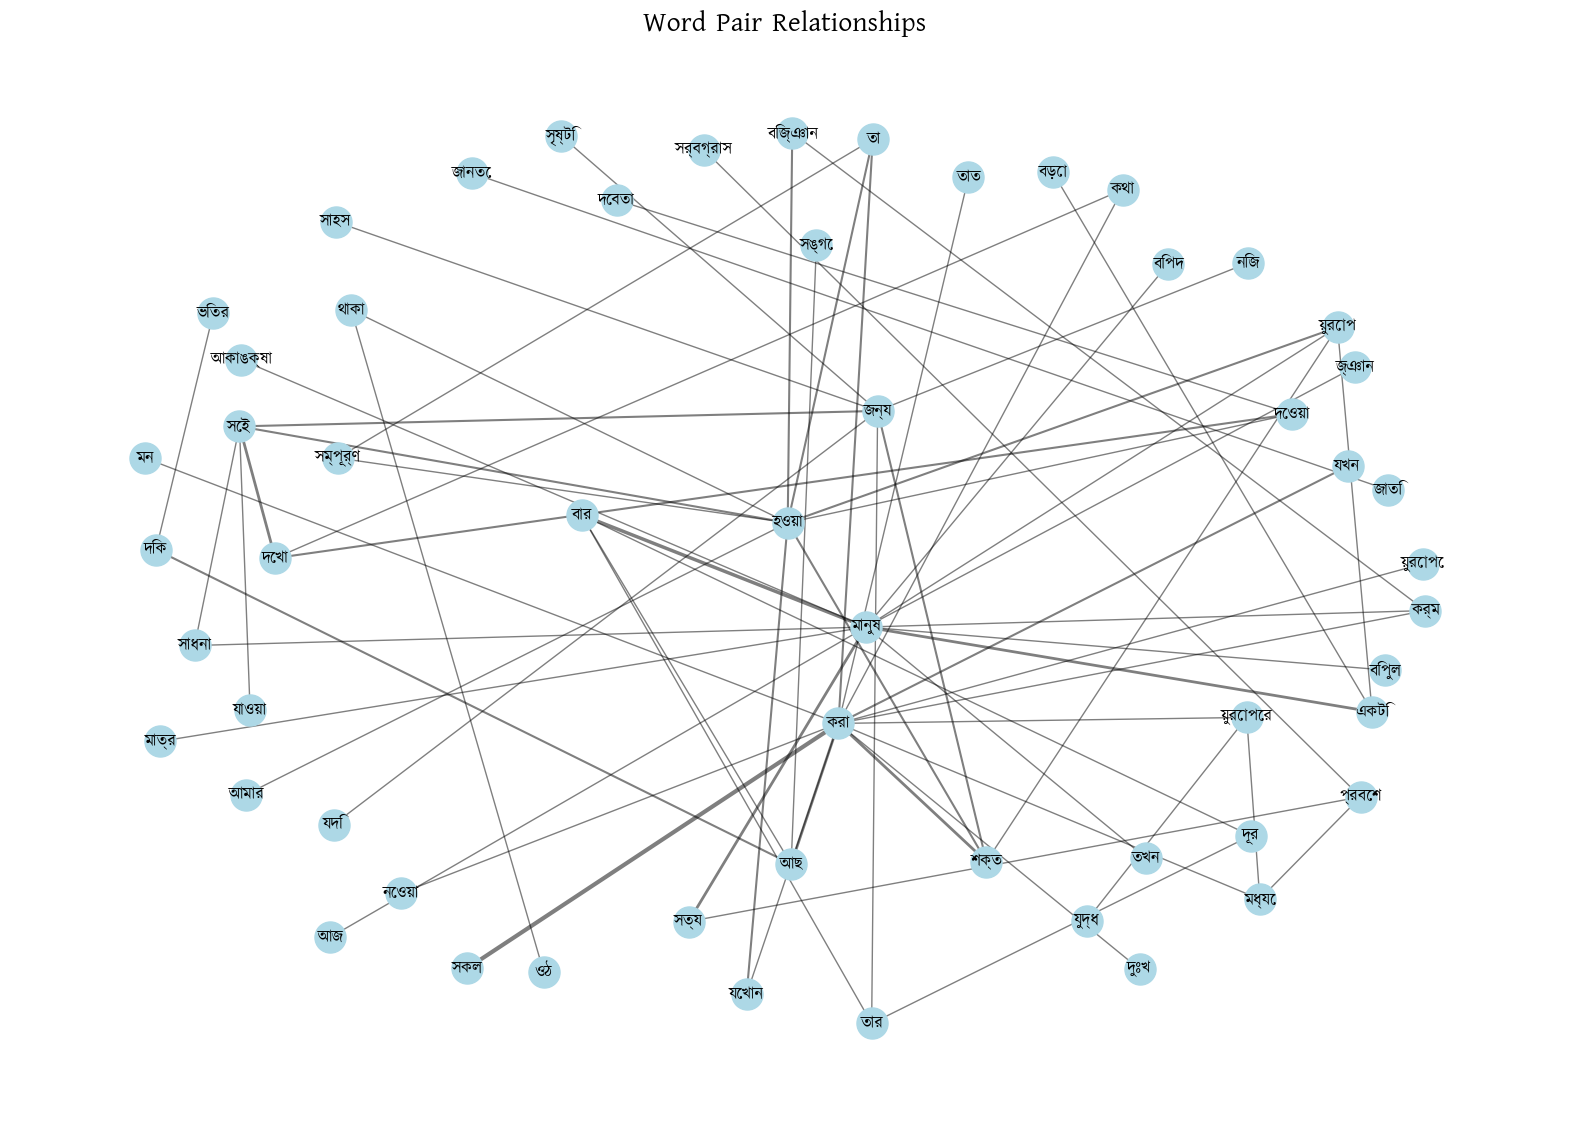

Global Clustering Coefficient: 0.07857360893075178
H-index of the graph: 5
Clique Number: 3
Maximal Clique Number: 3
Maximal Clique Nodes: করা, য়ুরোপের, মধ্যে
Maximum Clique Number: 3
Maximum Clique Nodes: করা, য়ুরোপের, মধ্যে


In [73]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity
import logging
from pathlib import Path
import matplotlib.font_manager as fm
from gensim.models import Word2Vec

# Logging setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Function to set up custom font for Bangla
def custom_font(font_path):
    try:
        font_path = Path(font_path)
        if not font_path.exists():
            logger.error(f"Font file not found: {font_path}")
            return None

        font_prop = fm.FontProperties(fname=str(font_path))
        font_name = font_prop.get_name()
        fm.fontManager.addfont(str(font_path))

        plt.rcParams['font.family'] = font_name
        logger.info(f"Font loaded successfully: {font_name}")
        return font_name
    except Exception as e:
        logger.error(f"Error loading font: {e}")
        return None

# Function to check frequency of word pairs
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)
    for sentence in cleaned_sentences:
        words = sentence.split()
        unique_words = set(words)
        word_pairs = combinations(unique_words, 2)
        for pair in word_pairs:
            pair_frequency[pair] += 1
    return pair_frequency

# Function to create graph from word pairs with frequency > 1 and cosine similarity > 0.1
def create_graph(pair_frequency, word_embeddings, similarity_threshold=0.1):
    G = nx.Graph()

    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            node1, node2 = pair
            if node1 in word_embeddings and node2 in word_embeddings:
                vec1 = word_embeddings[node1].reshape(1, -1)
                vec2 = word_embeddings[node2].reshape(1, -1)
                similarity = cosine_similarity(vec1, vec2)[0][0]
                if similarity > similarity_threshold:
                    G.add_edge(node1, node2, weight=frequency, similarity=similarity)

    return G

# Function to get Word2Vec embeddings for the words in the graph
def get_word2vec_embeddings(cleaned_sentences, graph_nodes, vector_size=100, window=5, min_count=1):
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)
    word_vectors = model.wv
    vectors = {word: word_vectors[word] for word in graph_nodes if word in word_vectors}
    return vectors

# Graph analysis functions
def global_clustering_coefficient(G):
    if G.number_of_nodes() > 0:
        return nx.average_clustering(G)
    return 0

def h_index(G):
    if G.number_of_nodes() > 0:
        degrees = sorted([deg for _, deg in G.degree()], reverse=True)
        h = 0
        for i, degree in enumerate(degrees):
            if degree >= i + 1:
                h = i + 1
            else:
                break
        return h
    return 0

# Function to calculate Clique Metrics
def calculate_clique_metrics(G):
    cliques = list(nx.find_cliques(G))

    # Clique Number: Size of the largest clique in the graph
    clique_number = max(len(clique) for clique in cliques) if cliques else 0

    # Maximal Clique Number: Size of the largest maximal clique
    maximal_clique_number = 0
    maximal_clique = []
    for clique in cliques:
        # Check if the subgraph induced by the clique is a complete graph
        subgraph = G.subgraph(clique)
        if len(clique) > maximal_clique_number:
            maximal_clique_number = len(clique)
            maximal_clique = clique

    # Maximum Clique: The actual nodes in the largest clique
    maximum_clique = max(cliques, key=len) if cliques else []

    return clique_number, maximal_clique_number, maximal_clique, maximum_clique

# Function to plot nodes with word embeddings and Bangla labels
def plot_nodes(pair_frequency, word_embeddings, font_path, similarity_threshold=0.1):
    font_name = custom_font(font_path)
    if not font_name:
        logger.warning("Could not load font. Falling back to default font.")

    G = create_graph(pair_frequency, word_embeddings, similarity_threshold)

    # Check if the graph is empty
    if G.number_of_nodes() == 0:
        logger.warning("The graph is empty, skipping plot.")
        return

    total_nodes = len(G.nodes)
    print(f"Total number of nodes: {total_nodes}")

    # Positioning of nodes using spring layout
    pos = nx.spring_layout(G, k=2)
    weights = nx.get_edge_attributes(G, 'weight').values()

    plt.figure(figsize=(20, 14))

    # Draw network nodes with light blue color
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')

    # Draw edges with widths proportional to their weight
    nx.draw_networkx_edges(G, pos, width=[w / 2 for w in weights], alpha=0.5)

    # Draw node labels using the custom Bangla font
    nx.draw_networkx_labels(G, pos, font_size=12, font_family=plt.rcParams['font.family'])

    # Set title and axis
    plt.title('Word Pair Relationships', fontdict={'fontsize': 20, 'fontweight': 'bold'}, fontfamily=plt.rcParams['font.family'])
    plt.axis('off')

    # Show the plot
    plt.show()

# Path to the Kalpurush font (replace with your font path)
font_path = 'kalpurush.ttf'

# Generate pair frequency (Assuming cleaned_sentences is already defined)
pair_frequency = check_pair_frequency(cleaned_sentences)

# Extract the nodes (unique words) from the pair frequency
graph_nodes = list(set([node for pair in pair_frequency for node in pair]))

# Get Word2Vec embeddings for the graph nodes (words involved in word pairs with frequency > 1)
word2vec_embeddings = get_word2vec_embeddings(cleaned_sentences, graph_nodes)

# Plot nodes with Bangla labels for word pairs with cosine similarity > 0.1
plot_nodes(pair_frequency, word2vec_embeddings, font_path, similarity_threshold=0.1)

# Create graph from word pairs with frequency > 1
G = create_graph(pair_frequency, word2vec_embeddings)

# Calculate and print Global Clustering Coefficient and H-index
print(f"Global Clustering Coefficient: {global_clustering_coefficient(G)}")
print(f"H-index of the graph: {h_index(G)}")

# Calculate Clique Metrics
clique_number, maximal_clique_number, maximal_clique, maximum_clique = calculate_clique_metrics(G)

# Print the clique metrics
print(f"Clique Number: {clique_number}")
print(f"Maximal Clique Number: {maximal_clique_number}")
print(f"Maximal Clique Nodes: {', '.join(maximal_clique)}")
print(f"Maximum Clique Number: {len(maximum_clique)}")
print(f"Maximum Clique Nodes: {', '.join(maximum_clique)}")


Total number of nodes: 56


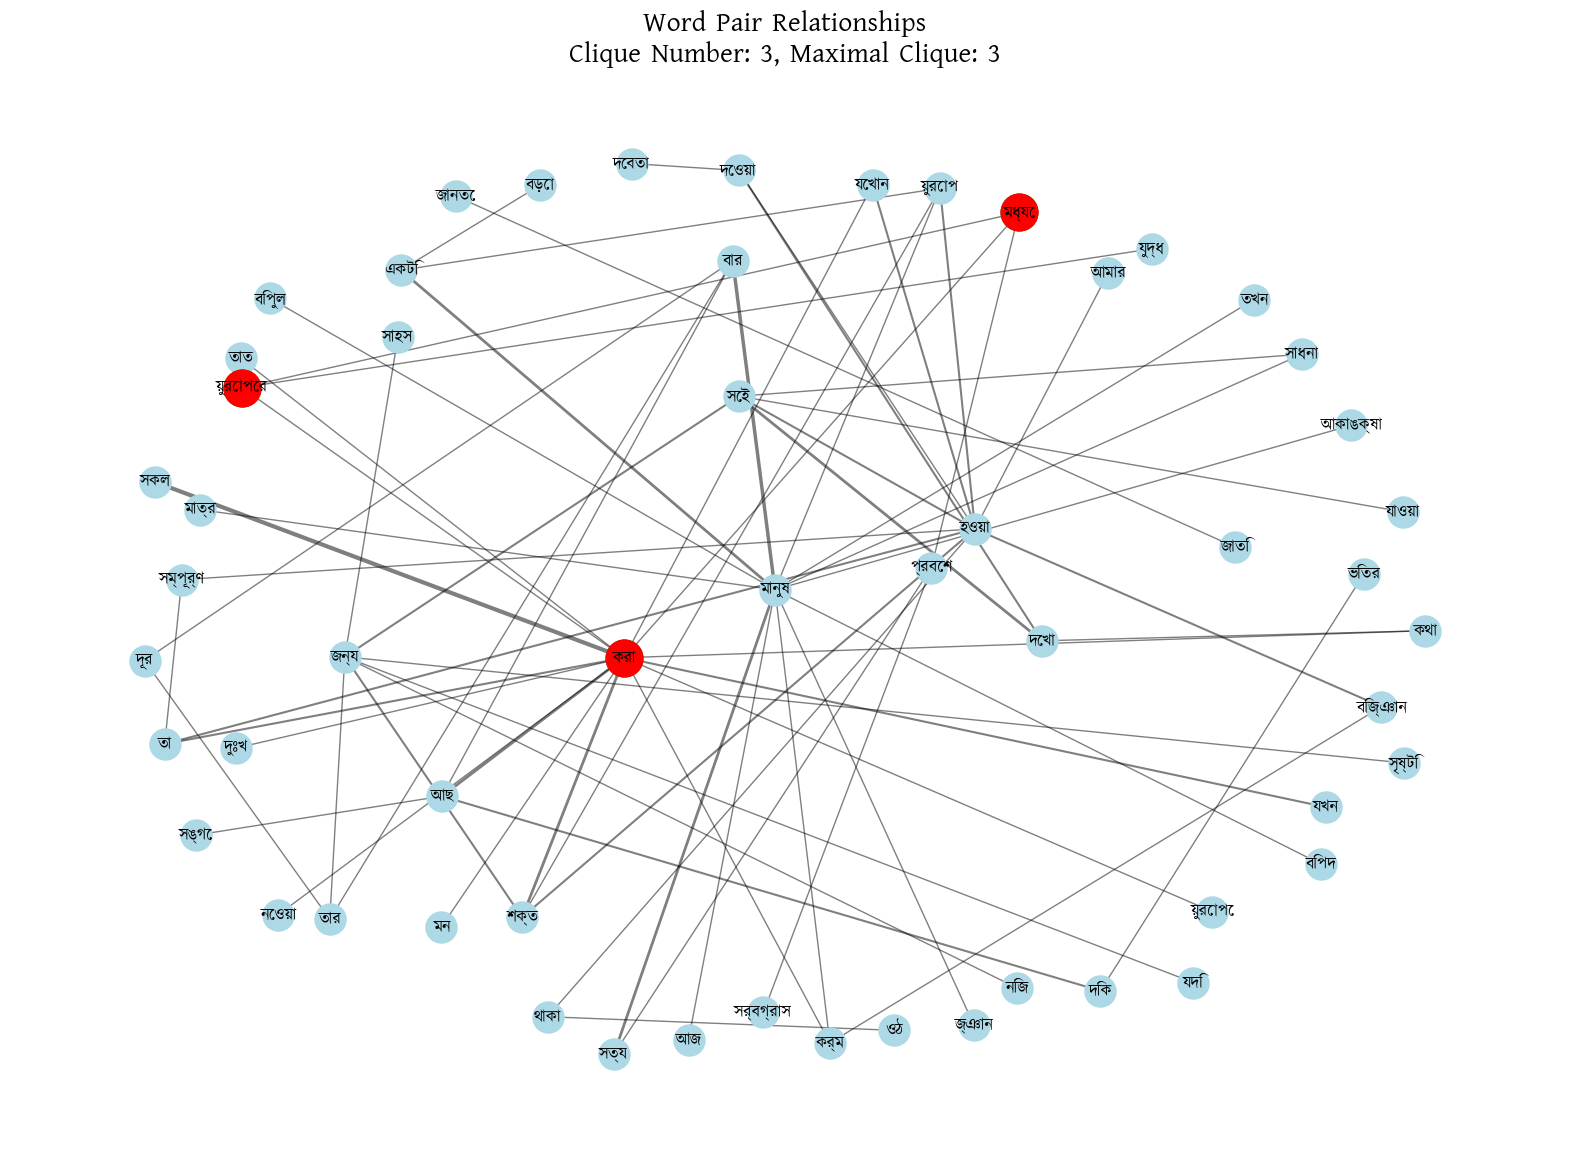

Global Clustering Coefficient: 0.07857360893075178
H-index of the graph: 5
Clique Number: 3
Maximal Clique Number: 3
Maximal Clique Nodes: করা, য়ুরোপের, মধ্যে
Maximum Clique Number: 3
Maximum Clique Nodes: করা, য়ুরোপের, মধ্যে


In [74]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity
import logging
from pathlib import Path
import matplotlib.font_manager as fm
from gensim.models import Word2Vec

# Logging setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Function to set up custom font for Bangla
def custom_font(font_path):
    try:
        font_path = Path(font_path)
        if not font_path.exists():
            logger.error(f"Font file not found: {font_path}")
            return None

        font_prop = fm.FontProperties(fname=str(font_path))
        font_name = font_prop.get_name()
        fm.fontManager.addfont(str(font_path))

        plt.rcParams['font.family'] = font_name
        logger.info(f"Font loaded successfully: {font_name}")
        return font_name
    except Exception as e:
        logger.error(f"Error loading font: {e}")
        return None

# Function to check frequency of word pairs
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)
    for sentence in cleaned_sentences:
        words = sentence.split()
        unique_words = set(words)
        word_pairs = combinations(unique_words, 2)
        for pair in word_pairs:
            pair_frequency[pair] += 1
    return pair_frequency

# Function to create graph from word pairs with frequency > 1 and cosine similarity > 0.1
def create_graph(pair_frequency, word_embeddings, similarity_threshold=0.1):
    G = nx.Graph()

    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            node1, node2 = pair
            if node1 in word_embeddings and node2 in word_embeddings:
                vec1 = word_embeddings[node1].reshape(1, -1)
                vec2 = word_embeddings[node2].reshape(1, -1)
                similarity = cosine_similarity(vec1, vec2)[0][0]
                if similarity > similarity_threshold:
                    G.add_edge(node1, node2, weight=frequency, similarity=similarity)

    return G

# Function to get Word2Vec embeddings for the words in the graph
def get_word2vec_embeddings(cleaned_sentences, graph_nodes, vector_size=100, window=5, min_count=1):
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)
    word_vectors = model.wv
    vectors = {word: word_vectors[word] for word in graph_nodes if word in word_vectors}
    return vectors

# Graph analysis functions
def global_clustering_coefficient(G):
    if G.number_of_nodes() > 0:
        return nx.average_clustering(G)
    return 0

def h_index(G):
    if G.number_of_nodes() > 0:
        degrees = sorted([deg for _, deg in G.degree()], reverse=True)
        h = 0
        for i, degree in enumerate(degrees):
            if degree >= i + 1:
                h = i + 1
            else:
                break
        return h
    return 0

# Function to calculate Clique Metrics
def calculate_clique_metrics(G):
    cliques = list(nx.find_cliques(G))

    # Clique Number: Size of the largest clique in the graph
    clique_number = max(len(clique) for clique in cliques) if cliques else 0

    # Maximal Clique Number: Size of the largest maximal clique
    maximal_clique_number = 0
    maximal_clique = []
    for clique in cliques:
        # Check if the subgraph induced by the clique is a complete graph
        subgraph = G.subgraph(clique)
        if len(clique) > maximal_clique_number:
            maximal_clique_number = len(clique)
            maximal_clique = clique

    # Maximum Clique: The actual nodes in the largest clique
    maximum_clique = max(cliques, key=len) if cliques else []

    return clique_number, maximal_clique_number, maximal_clique, maximum_clique

# Function to plot nodes with word embeddings and Bangla labels
def plot_nodes(pair_frequency, word_embeddings, font_path, similarity_threshold=0.1):
    font_name = custom_font(font_path)
    if not font_name:
        logger.warning("Could not load font. Falling back to default font.")

    G = create_graph(pair_frequency, word_embeddings, similarity_threshold)

    # Check if the graph is empty
    if G.number_of_nodes() == 0:
        logger.warning("The graph is empty, skipping plot.")
        return

    total_nodes = len(G.nodes)
    print(f"Total number of nodes: {total_nodes}")

    # Positioning of nodes using spring layout
    pos = nx.spring_layout(G, k=2)
    weights = nx.get_edge_attributes(G, 'weight').values()

    # Calculate clique metrics
    clique_number, maximal_clique_number, maximal_clique, maximum_clique = calculate_clique_metrics(G)

    # Plot the entire graph
    plt.figure(figsize=(20, 14))
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
    nx.draw_networkx_edges(G, pos, width=[w / 2 for w in weights], alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=12, font_family=plt.rcParams['font.family'])

    # Plot the cliques
    if maximum_clique:
        nx.draw_networkx_nodes(G, pos, nodelist=maximum_clique, node_color='green', node_size=700)
    if maximal_clique:
        nx.draw_networkx_nodes(G, pos, nodelist=maximal_clique, node_color='red', node_size=700)

    # Set title and axis
    plt.title(f'Word Pair Relationships\nClique Number: {clique_number}, Maximal Clique: {maximal_clique_number}',
              fontdict={'fontsize': 20, 'fontweight': 'bold'}, fontfamily=plt.rcParams['font.family'])
    plt.axis('off')

    # Show the plot
    plt.show()

# Path to the Kalpurush font (replace with your font path)
font_path = 'kalpurush.ttf'

# Generate pair frequency (Assuming cleaned_sentences is already defined)
pair_frequency = check_pair_frequency(cleaned_sentences)

# Extract the nodes (unique words) from the pair frequency
graph_nodes = list(set([node for pair in pair_frequency for node in pair]))

# Get Word2Vec embeddings for the graph nodes (words involved in word pairs with frequency > 1)
word2vec_embeddings = get_word2vec_embeddings(cleaned_sentences, graph_nodes)

# Plot nodes with Bangla labels for word pairs with cosine similarity > 0.1
plot_nodes(pair_frequency, word2vec_embeddings, font_path, similarity_threshold=0.1)

# Create graph from word pairs with frequency > 1
G = create_graph(pair_frequency, word2vec_embeddings)

# Calculate and print Global Clustering Coefficient and H-index
print(f"Global Clustering Coefficient: {global_clustering_coefficient(G)}")
print(f"H-index of the graph: {h_index(G)}")

# Calculate Clique Metrics
clique_number, maximal_clique_number, maximal_clique, maximum_clique = calculate_clique_metrics(G)

# Print the clique metrics
print(f"Clique Number: {clique_number}")
print(f"Maximal Clique Number: {maximal_clique_number}")
print(f"Maximal Clique Nodes: {', '.join(maximal_clique)}")
print(f"Maximum Clique Number: {len(maximum_clique)}")
print(f"Maximum Clique Nodes: {', '.join(maximum_clique)}")


Total number of nodes: 56


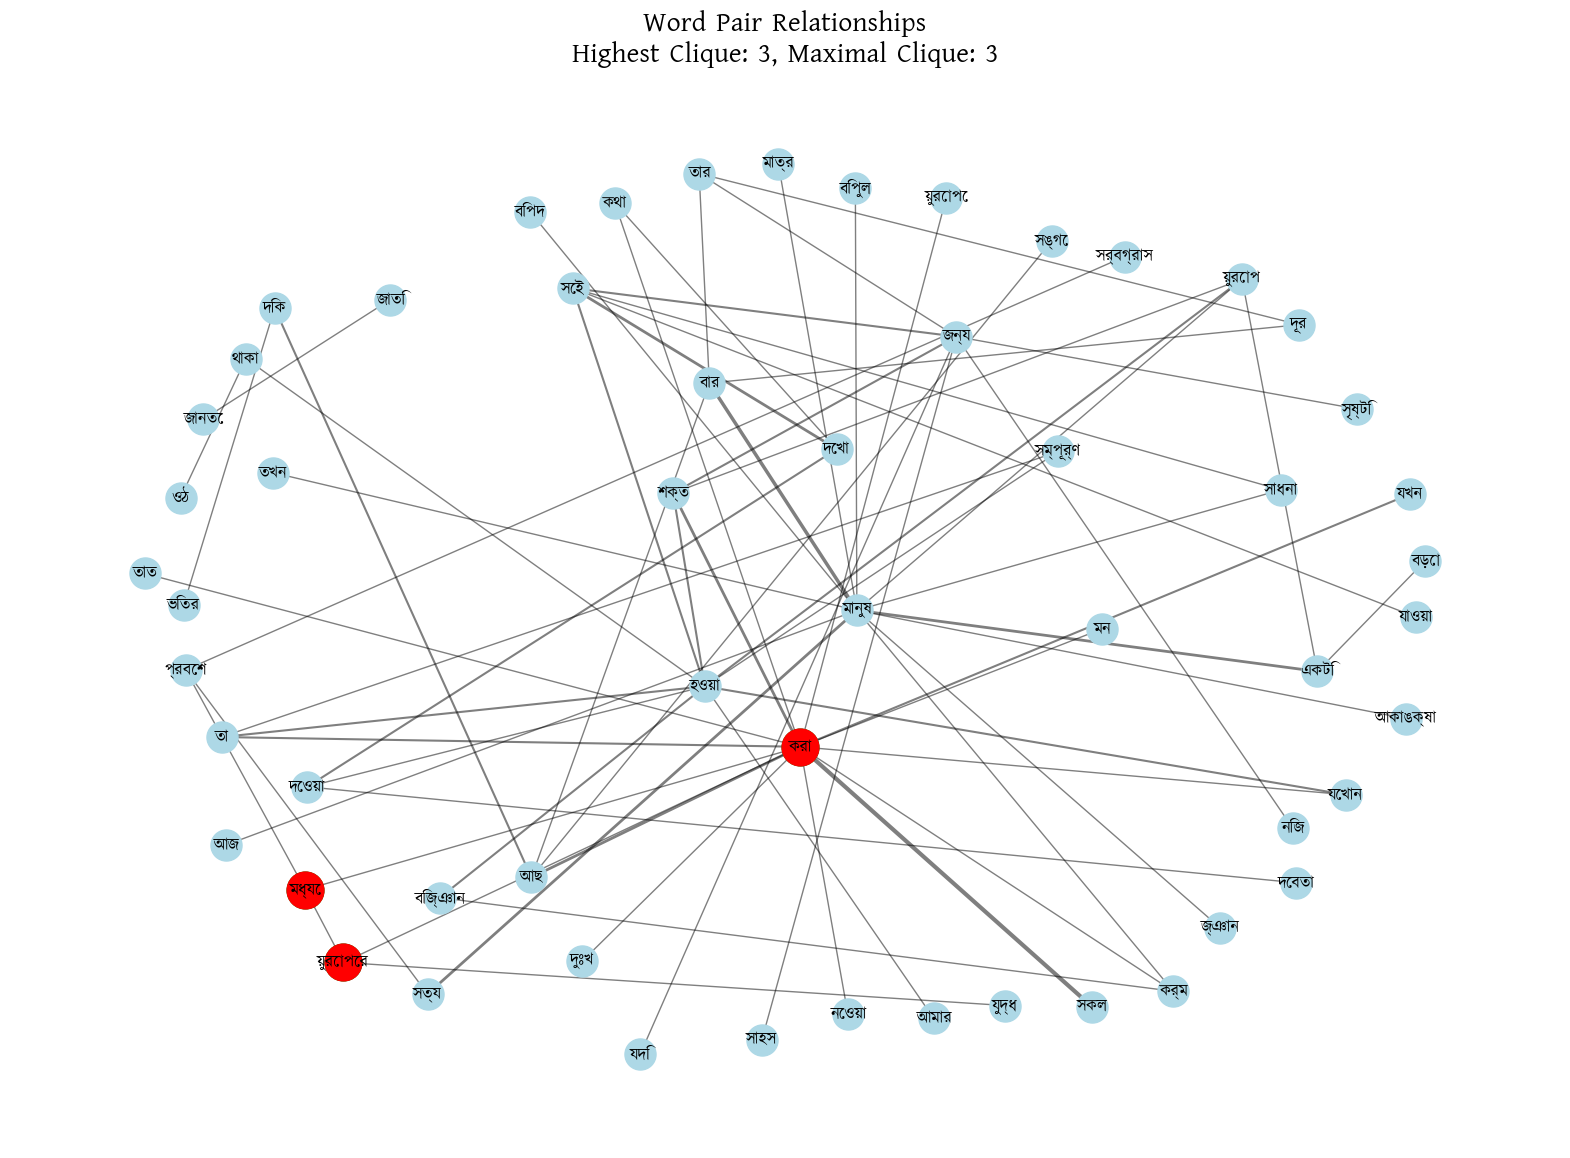

Global Clustering Coefficient: 0.07857360893075178
H-index of the graph: 5
Highest Clique Number: 3
Maximal Clique Number: 3
Maximal Clique Nodes: করা, য়ুরোপের, মধ্যে
Maximum Clique Number: 3
Maximum Clique Nodes: করা, য়ুরোপের, মধ্যে


In [75]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity
import logging
from pathlib import Path
import matplotlib.font_manager as fm
from gensim.models import Word2Vec

# Logging setup
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Function to set up custom font for Bangla
def custom_font(font_path):
    try:
        font_path = Path(font_path)
        if not font_path.exists():
            logger.error(f"Font file not found: {font_path}")
            return None

        font_prop = fm.FontProperties(fname=str(font_path))
        font_name = font_prop.get_name()
        fm.fontManager.addfont(str(font_path))

        plt.rcParams['font.family'] = font_name
        logger.info(f"Font loaded successfully: {font_name}")
        return font_name
    except Exception as e:
        logger.error(f"Error loading font: {e}")
        return None

# Function to check frequency of word pairs
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)
    for sentence in cleaned_sentences:
        words = sentence.split()
        unique_words = set(words)
        word_pairs = combinations(unique_words, 2)
        for pair in word_pairs:
            pair_frequency[pair] += 1
    return pair_frequency

# Function to create graph from word pairs with frequency > 1 and cosine similarity > 0.1
def create_graph(pair_frequency, word_embeddings, similarity_threshold=0.1):
    G = nx.Graph()

    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            node1, node2 = pair
            if node1 in word_embeddings and node2 in word_embeddings:
                vec1 = word_embeddings[node1].reshape(1, -1)
                vec2 = word_embeddings[node2].reshape(1, -1)
                similarity = cosine_similarity(vec1, vec2)[0][0]
                if similarity > similarity_threshold:
                    G.add_edge(node1, node2, weight=frequency, similarity=similarity)

    return G

# Function to get Word2Vec embeddings for the words in the graph
def get_word2vec_embeddings(cleaned_sentences, graph_nodes, vector_size=100, window=5, min_count=1):
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)
    word_vectors = model.wv
    vectors = {word: word_vectors[word] for word in graph_nodes if word in word_vectors}
    return vectors

# Graph analysis functions
def global_clustering_coefficient(G):
    if G.number_of_nodes() > 0:
        return nx.average_clustering(G)
    return 0

def h_index(G):
    if G.number_of_nodes() > 0:
        degrees = sorted([deg for _, deg in G.degree()], reverse=True)
        h = 0
        for i, degree in enumerate(degrees):
            if degree >= i + 1:
                h = i + 1
            else:
                break
        return h
    return 0

# Function to calculate Clique Metrics
def calculate_clique_metrics(G):
    # Get all cliques in the graph
    cliques = list(nx.find_cliques(G))

    # Highest Clique Number: Size of the largest clique in the graph
    highest_clique_number = max(len(clique) for clique in cliques) if cliques else 0

    # Maximum Clique Number: Size of the largest maximal clique
    maximal_clique_number = 0
    maximal_clique = []
    for clique in cliques:
        subgraph = G.subgraph(clique)
        if len(clique) > maximal_clique_number:
            maximal_clique_number = len(clique)
            maximal_clique = clique

    # Maximum Clique: The actual nodes in the largest clique (highest clique size)
    maximum_clique = max(cliques, key=len) if cliques else []

    return highest_clique_number, maximal_clique_number, maximal_clique, maximum_clique

# Function to plot nodes with word embeddings and Bangla labels
def plot_nodes(pair_frequency, word_embeddings, font_path, similarity_threshold=0.1):
    font_name = custom_font(font_path)
    if not font_name:
        logger.warning("Could not load font. Falling back to default font.")

    G = create_graph(pair_frequency, word_embeddings, similarity_threshold)

    # Check if the graph is empty
    if G.number_of_nodes() == 0:
        logger.warning("The graph is empty, skipping plot.")
        return

    total_nodes = len(G.nodes)
    print(f"Total number of nodes: {total_nodes}")

    # Positioning of nodes using spring layout
    pos = nx.spring_layout(G, k=2)
    weights = nx.get_edge_attributes(G, 'weight').values()

    # Calculate clique metrics
    highest_clique_number, maximal_clique_number, maximal_clique, maximum_clique = calculate_clique_metrics(G)

    # Plot the entire graph
    plt.figure(figsize=(20, 14))
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
    nx.draw_networkx_edges(G, pos, width=[w / 2 for w in weights], alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=12, font_family=plt.rcParams['font.family'])

    # Plot the cliques
    if maximum_clique:
        nx.draw_networkx_nodes(G, pos, nodelist=maximum_clique, node_color='green', node_size=700)
    if maximal_clique:
        nx.draw_networkx_nodes(G, pos, nodelist=maximal_clique, node_color='red', node_size=700)

    # Set title and axis
    plt.title(f'Word Pair Relationships\nHighest Clique: {highest_clique_number}, Maximal Clique: {maximal_clique_number}',
              fontdict={'fontsize': 20, 'fontweight': 'bold'}, fontfamily=plt.rcParams['font.family'])
    plt.axis('off')

    # Show the plot
    plt.show()

# Path to the Kalpurush font (replace with your font path)
font_path = 'kalpurush.ttf'


# Generate pair frequency (Assuming cleaned_sentences is already defined)
pair_frequency = check_pair_frequency(cleaned_sentences)

# Extract the nodes (unique words) from the pair frequency
graph_nodes = list(set([node for pair in pair_frequency for node in pair]))

# Get Word2Vec embeddings for the graph nodes (words involved in word pairs with frequency > 1)
word2vec_embeddings = get_word2vec_embeddings(cleaned_sentences, graph_nodes)

# Plot nodes with Bangla labels for word pairs with cosine similarity > 0.1
plot_nodes(pair_frequency, word2vec_embeddings, font_path, similarity_threshold=0.1)

# Create graph from word pairs with frequency > 1
G = create_graph(pair_frequency, word2vec_embeddings)

# Calculate and print Global Clustering Coefficient and H-index
print(f"Global Clustering Coefficient: {global_clustering_coefficient(G)}")
print(f"H-index of the graph: {h_index(G)}")

# Calculate Clique Metrics
highest_clique_number, maximal_clique_number, maximal_clique, maximum_clique = calculate_clique_metrics(G)

# Print the clique metrics
print(f"Highest Clique Number: {highest_clique_number}")
print(f"Maximal Clique Number: {maximal_clique_number}")
print(f"Maximal Clique Nodes: {', '.join(maximal_clique)}")
print(f"Maximum Clique Number: {len(maximum_clique)}")
print(f"Maximum Clique Nodes: {', '.join(maximum_clique)}")
